In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from numpy import percentile
from scipy import stats
from scipy.stats import skew
import scipy.stats as stat
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("co2_emissions (1).csv")

In [3]:
df

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


In [16]:
df.head(20)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Continuously Variable,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS,Z,10.6,7.5,9.2,31,212


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [7]:
df.shape

(7385, 12)

In [8]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

In [9]:
df.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

In [10]:
df['make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [11]:
df['vehicle_class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [12]:
df['transmission'].unique()

array(['AS', 'M', 'AV', 'AM', 'A'], dtype=object)

In [13]:
#Mapping similar labels into a single label for Transmission column

In [17]:
df["transmission"] = np.where(df["transmission"].isin(["A"]), "Automatic", df["transmission"])
df["transmission"] = np.where(df["transmission"].isin(["AM"]), "Automated Manual", df["transmission"])
df["transmission"] = np.where(df["transmission"].isin(["AS"]), "Automatic with Select Shift", df["transmission"])
df["transmission"] = np.where(df["transmission"].isin(["AV"]), "Continuously Variable", df["transmission"])
df["transmission"] = np.where(df["transmission"].isin(["M"]), "Manual", df["transmission"])

In [18]:
df['transmission'].unique()

array(['Automatic with Select Shift', 'Manual', 'Continuously Variable',
       'Automated Manual', 'Automatic'], dtype=object)

In [19]:
df['fuel_type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [20]:
#Changing the labels into a meaningful label

In [21]:
df['fuel_type'] = np.where(df['fuel_type']=="Z", "Premium Gasoline", df['fuel_type'])
df['fuel_type'] = np.where(df['fuel_type']=="X", "Regular Gasoline", df['fuel_type'])
df['fuel_type'] = np.where(df['fuel_type']=="D", "Diesel", df['fuel_type'])
df['fuel_type'] = np.where(df['fuel_type']=="E", "Ethanol(E85)",df['fuel_type'])
df['fuel_type'] = np.where(df['fuel_type']=="N", "Natural Gas", df['fuel_type'])

In [22]:
df['fuel_type'].unique()

array(['Premium Gasoline', 'Diesel', 'Regular Gasoline', 'Ethanol(E85)',
       'Natural Gas'], dtype=object)

In [23]:
df.head(20)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,Automatic with Select Shift,Premium Gasoline,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,Automatic with Select Shift,Premium Gasoline,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,Automatic with Select Shift,Premium Gasoline,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,Manual,Premium Gasoline,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,Automatic with Select Shift,Premium Gasoline,10.6,7.5,9.2,31,212


In [24]:
#Frequency Distribution of different Categorical Variables

In [25]:
# 1.Feature: make

Make
-------------  ---
FORD           628
CHEVROLET      588
BMW            527
MERCEDES-BENZ  419
PORSCHE        376
TOYOTA         330
GMC            328
AUDI           286
NISSAN         259
JEEP           251
DODGE          246
KIA            231
HONDA          214
HYUNDAI        210
MINI           204
VOLKSWAGEN     197
MAZDA          180
LEXUS          178
JAGUAR         160
CADILLAC       158
SUBARU         140
VOLVO          124
INFINITI       108
BUICK          103
RAM             97
LINCOLN         96
MITSUBISHI      95
CHRYSLER        88
LAND ROVER      85
FIAT            73
ACURA           72
MASERATI        61
ROLLS-ROYCE     50
ASTON MARTIN    47
BENTLEY         46
LAMBORGHINI     41
ALFA ROMEO      30
GENESIS         25
SCION           22
SMART            7
BUGATTI          3
SRT              2
-------------  ---


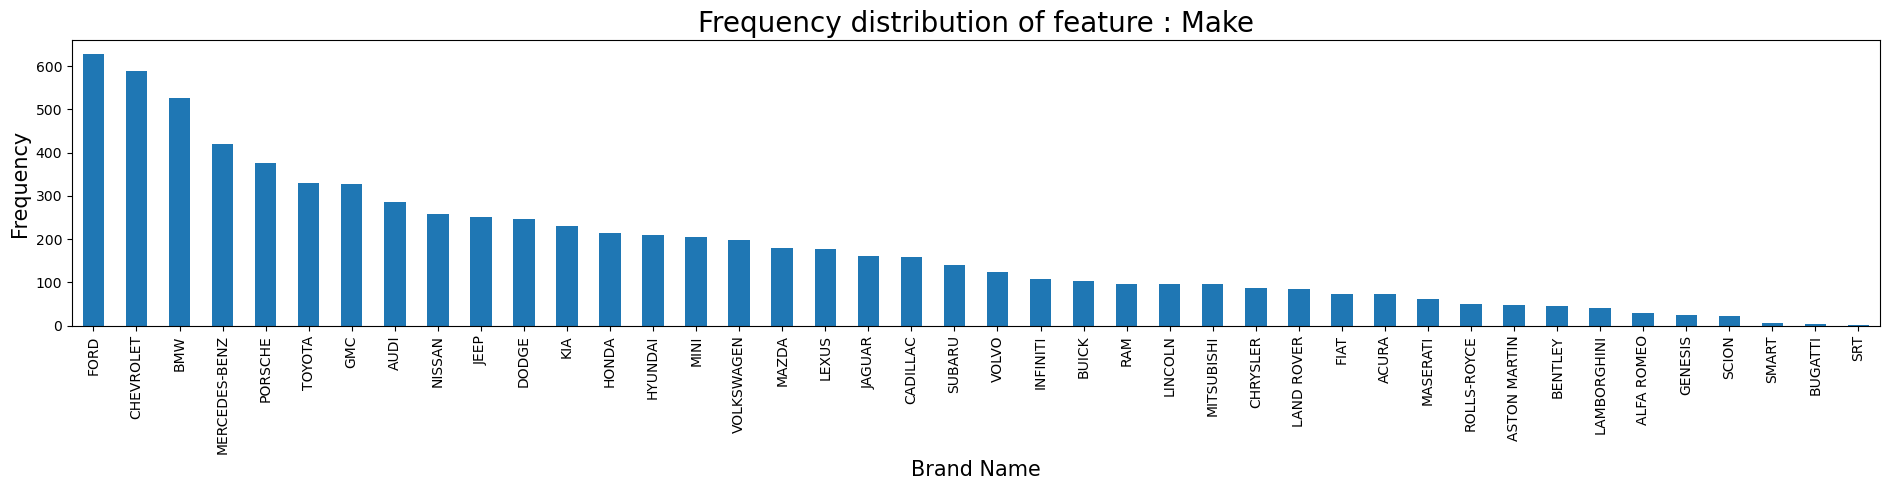

In [27]:
from tabulate import tabulate
print("Make")
print(tabulate(pd.DataFrame(df.make.value_counts())))

plt.figure(figsize=(19,5));
df.groupby("make")["make"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Make", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Brand Name", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [28]:
#2.Feature: model,working with Top 20 model

Top 20 car models out of total 2053 car models
-------------  --
F-150 FFV 4X4  32
F-150 FFV      32
MUSTANG        27
FOCUS FFV      24
SONIC          20
SONIC 5        20
F-150 4X4      20
F-150          20
ACCORD         19
COMPASS        19
JETTA          19
ATS            19
TACOMA 4WD     19
SILVERADO 4WD  18
FORTE 5        18
SILVERADO      18
CAMARO         18
SIERRA 4WD     18
COROLLA        18
SIERRA         18
-------------  --


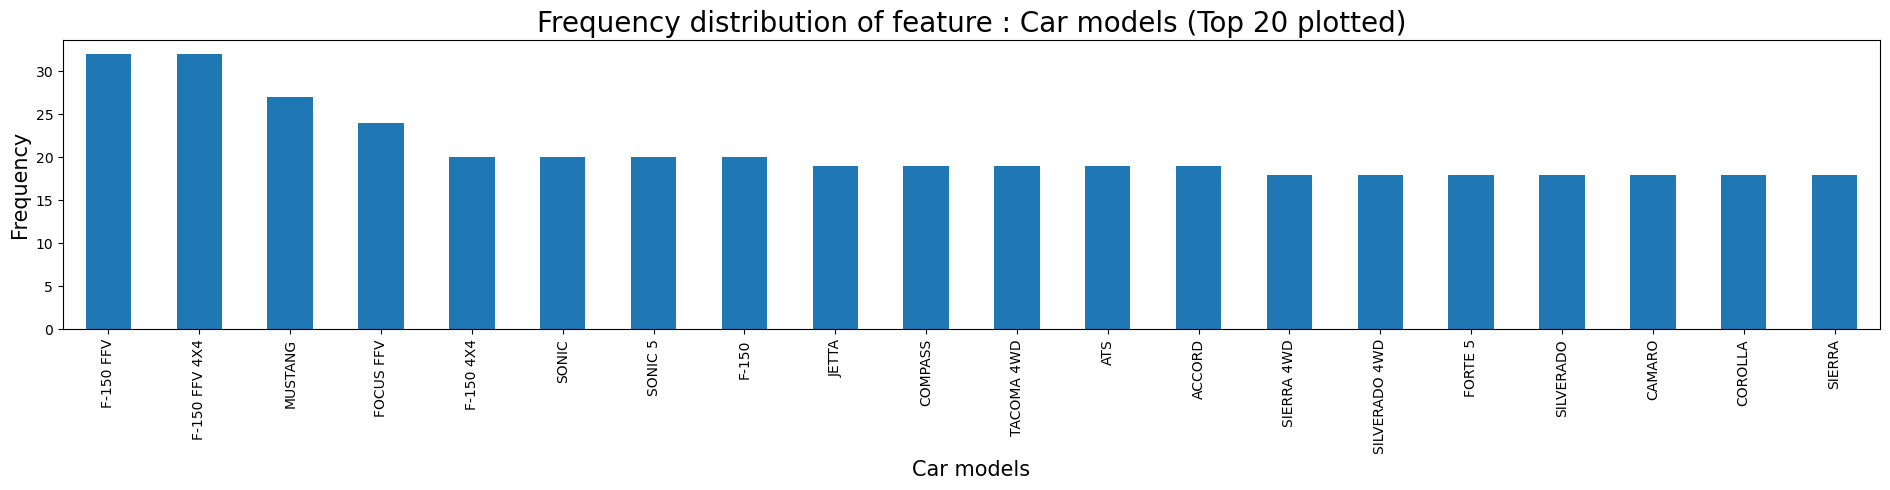

In [30]:
print(f"Top 20 car models out of total {df.model.nunique()} car models")
print(tabulate(pd.DataFrame(df.model.value_counts().sort_values(ascending=False)[:20])))

plt.figure(figsize=(19,5));
df.groupby("model")["model"].count().sort_values(ascending=False)[:20].plot(kind="bar")
plt.title("Frequency distribution of feature : Car models (Top 20 plotted)", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Car models", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [31]:
#3. Feature: vehicle_class

Vehicle Class
------------------------  ----
SUV - SMALL               1217
MID-SIZE                  1133
COMPACT                   1022
SUV - STANDARD             735
FULL-SIZE                  639
SUBCOMPACT                 606
PICKUP TRUCK - STANDARD    538
TWO-SEATER                 460
MINICOMPACT                326
STATION WAGON - SMALL      252
PICKUP TRUCK - SMALL       159
MINIVAN                     80
SPECIAL PURPOSE VEHICLE     77
VAN - PASSENGER             66
STATION WAGON - MID-SIZE    53
VAN - CARGO                 22
------------------------  ----


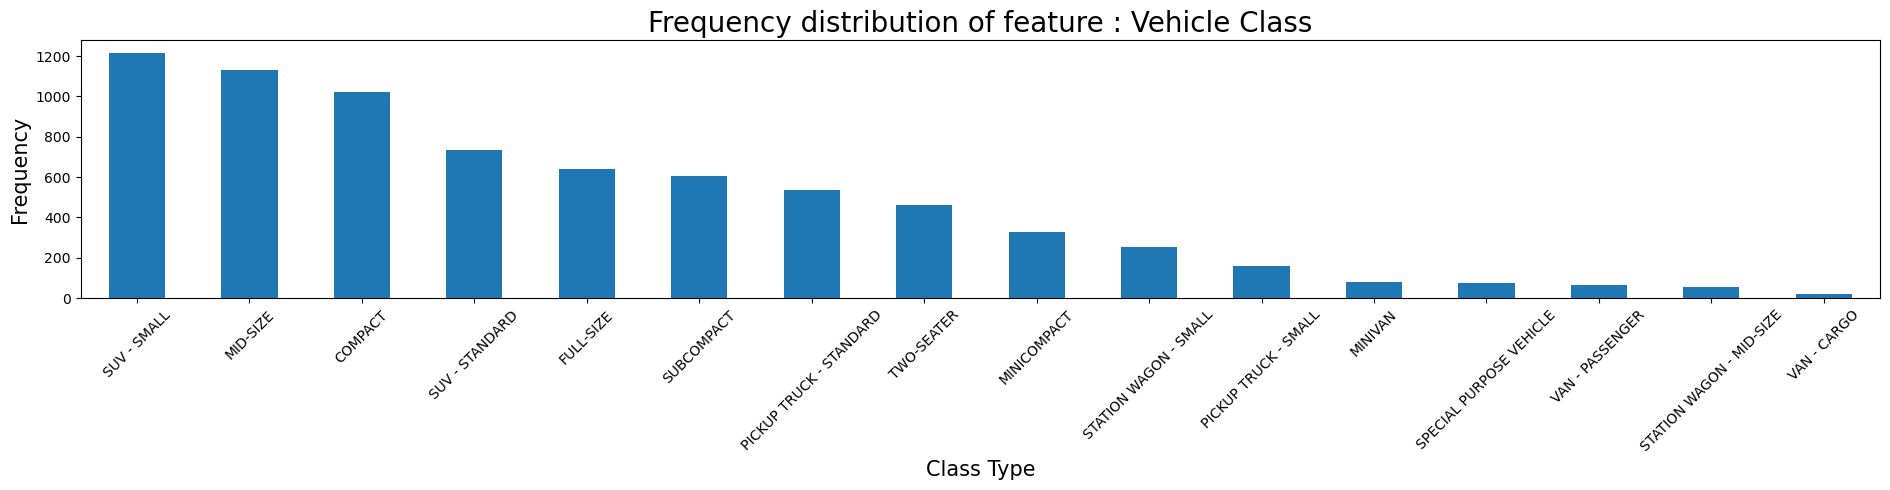

In [33]:
print("Vehicle Class")
print(tabulate(pd.DataFrame(df["vehicle_class"].value_counts())))

plt.figure(figsize=(19,5));
df.groupby("vehicle_class")["vehicle_class"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Vehicle Class", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Class Type", fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
#4. Feature: transmission

Transmission
---------------------------  ----
Automatic with Select Shift  3127
Automatic                    1851
Manual                       1185
Automated Manual              646
Continuously Variable         576
---------------------------  ----


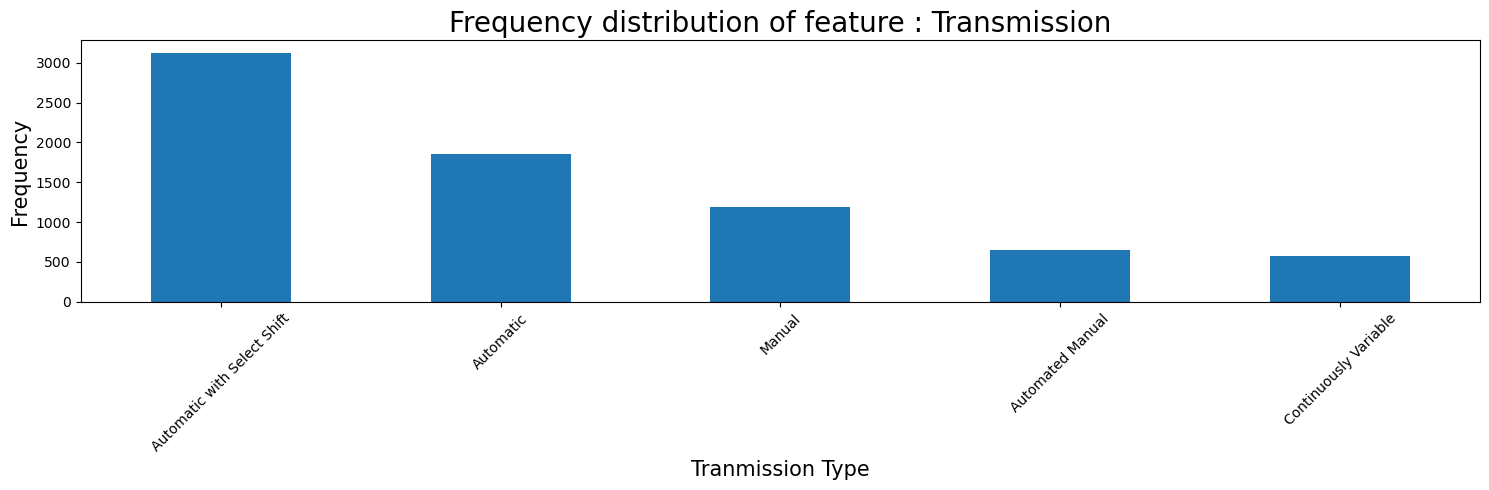

In [35]:
print("Transmission")
print(tabulate(pd.DataFrame(df.transmission.value_counts())))

plt.figure(figsize=(15,5));
df.groupby("transmission")["transmission"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Transmission", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Tranmission Type", fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
#5. Feature: fuel_type

Fuel Type
----------------  ----
Regular Gasoline  3637
Premium Gasoline  3202
Ethanol(E85)       370
Diesel             175
Natural Gas          1
----------------  ----


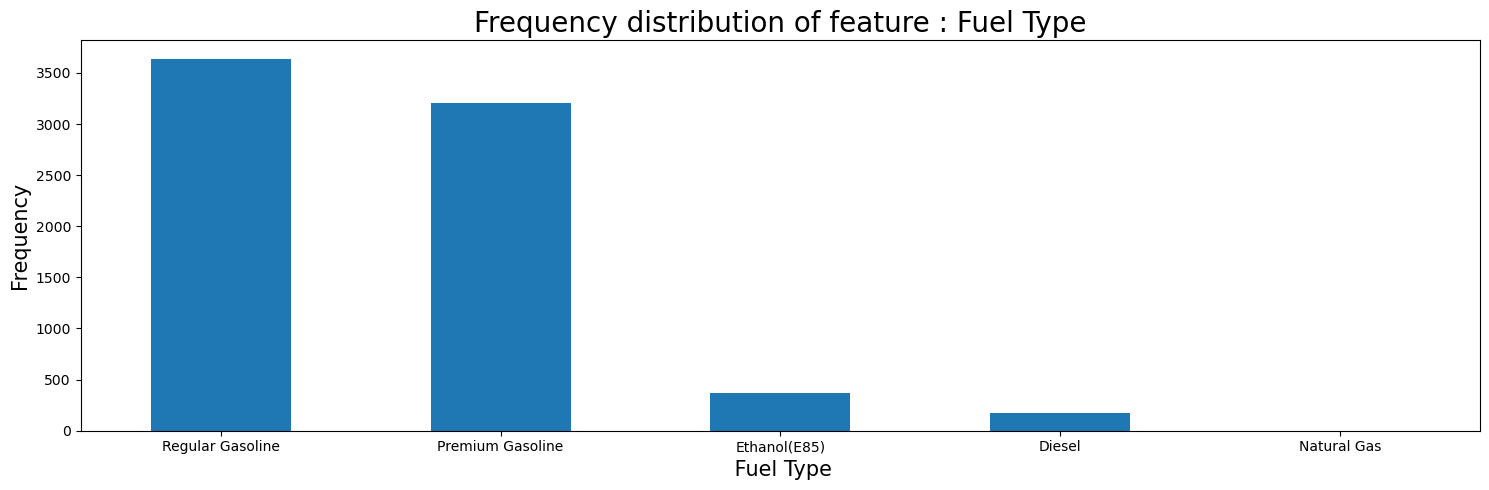

In [37]:
print("Fuel Type")
print(tabulate(pd.DataFrame(df["fuel_type"].value_counts())))

plt.figure(figsize=(15,5));
df.groupby("fuel_type")["fuel_type"].count().sort_values(ascending=False).plot(kind="bar")

plt.title("Frequency distribution of feature : Fuel Type", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel(" Fuel Type", fontsize=15)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [38]:
#Variation in CO2 emissions with different features

In [39]:
#1. Feature: make

Text(0, 0.5, 'co2_emissions')

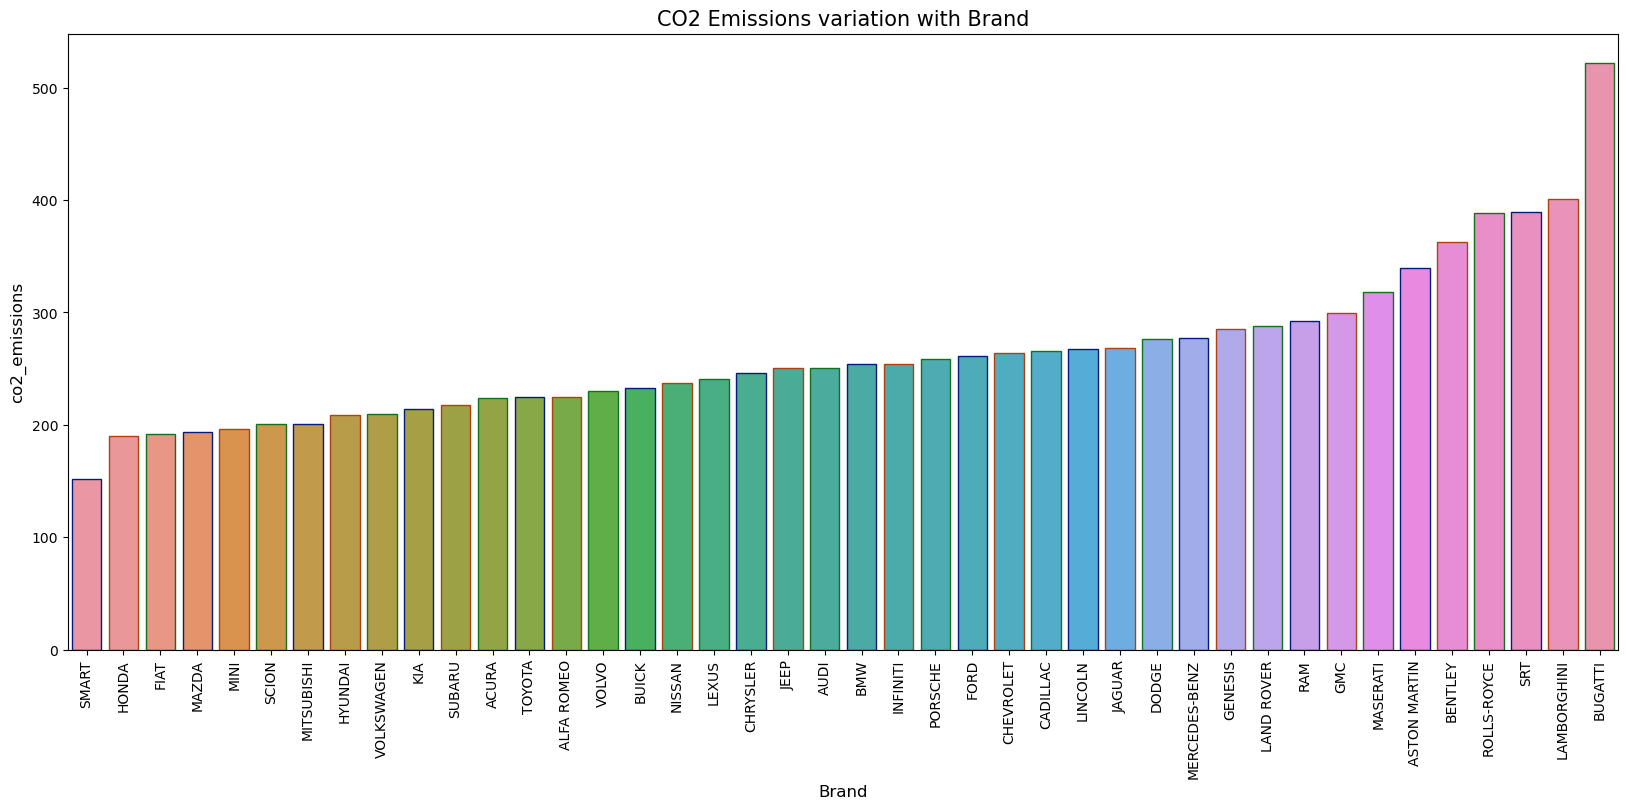

In [41]:
CO2_make = df.groupby(['make'])['co2_emissions'].mean().sort_values().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "make",y="co2_emissions",data = CO2_make,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Brand', fontsize=15)
plt.xlabel('Brand', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('co2_emissions', fontsize=12)

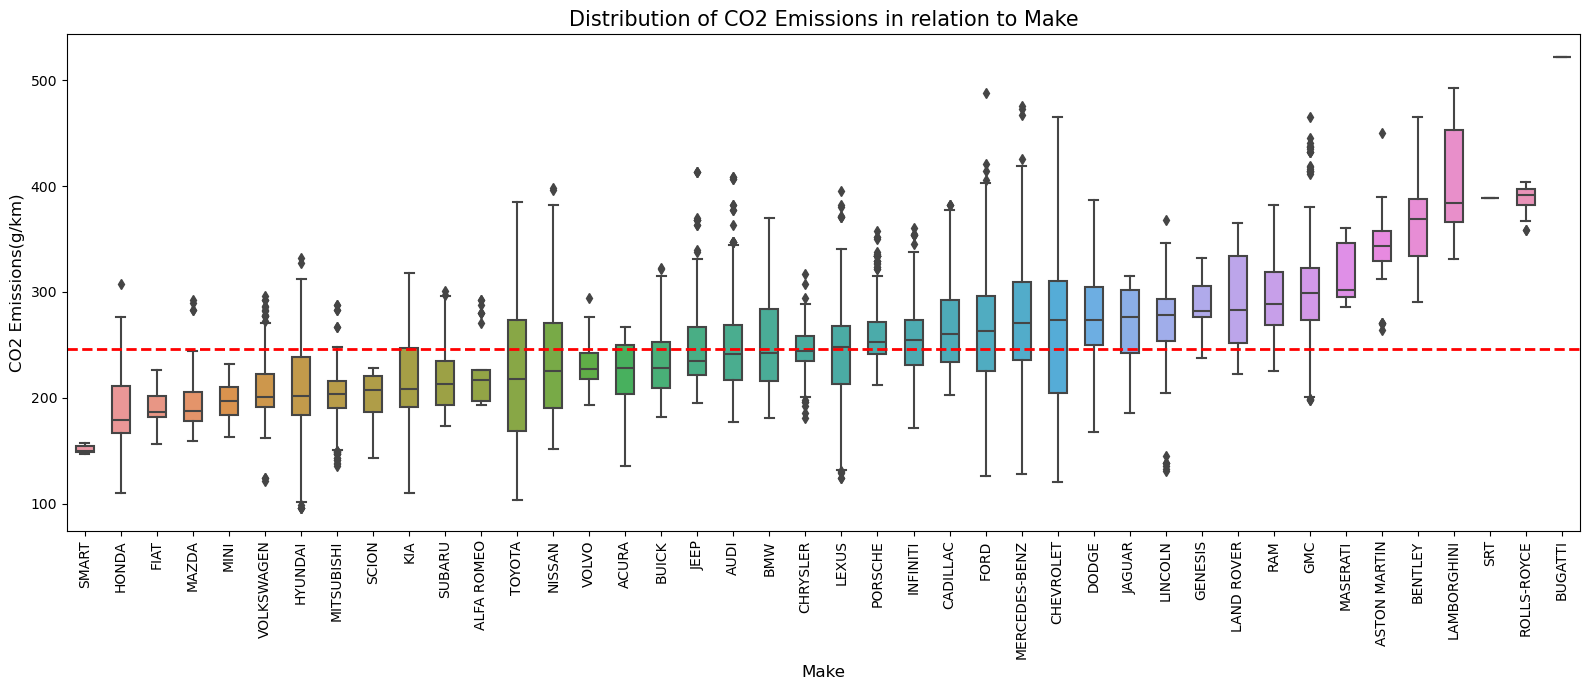

In [43]:
plt.figure(figsize=(16,7))
order = df.groupby("make")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="make", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Make", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

In [44]:
#2. Feature: vehicle_class

Text(0, 0.5, 'CO2 Emissions(g/km)')

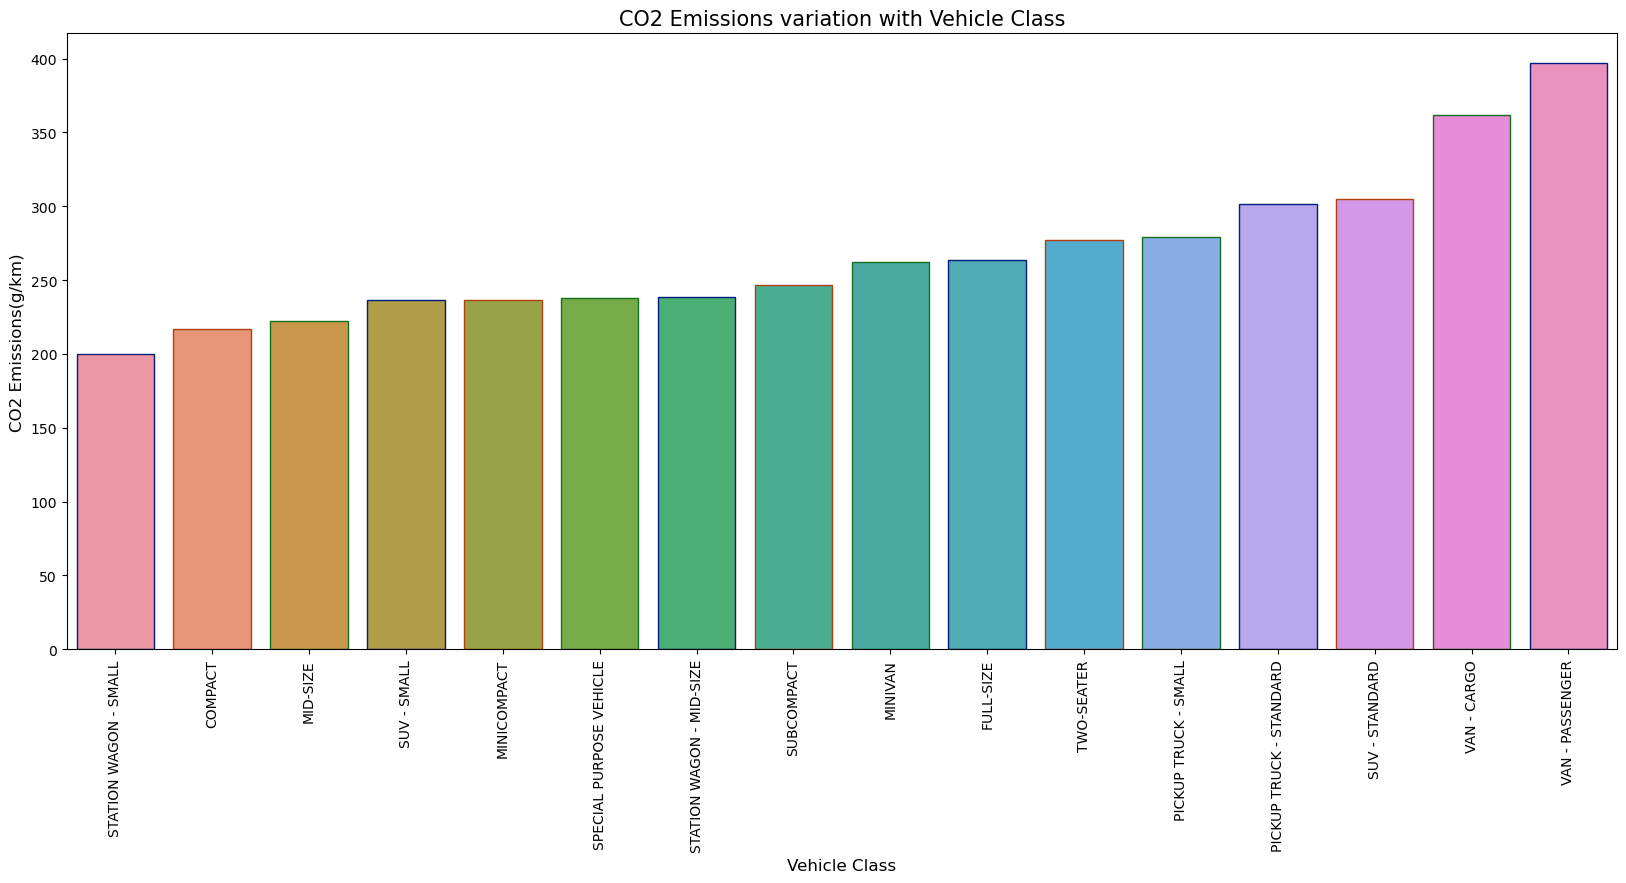

In [45]:
CO2_class = df.groupby(['vehicle_class'])['co2_emissions'].mean().sort_values().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "vehicle_class",y="co2_emissions",data = CO2_class,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Vehicle Class', fontsize=15)
plt.xlabel('Vehicle Class', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

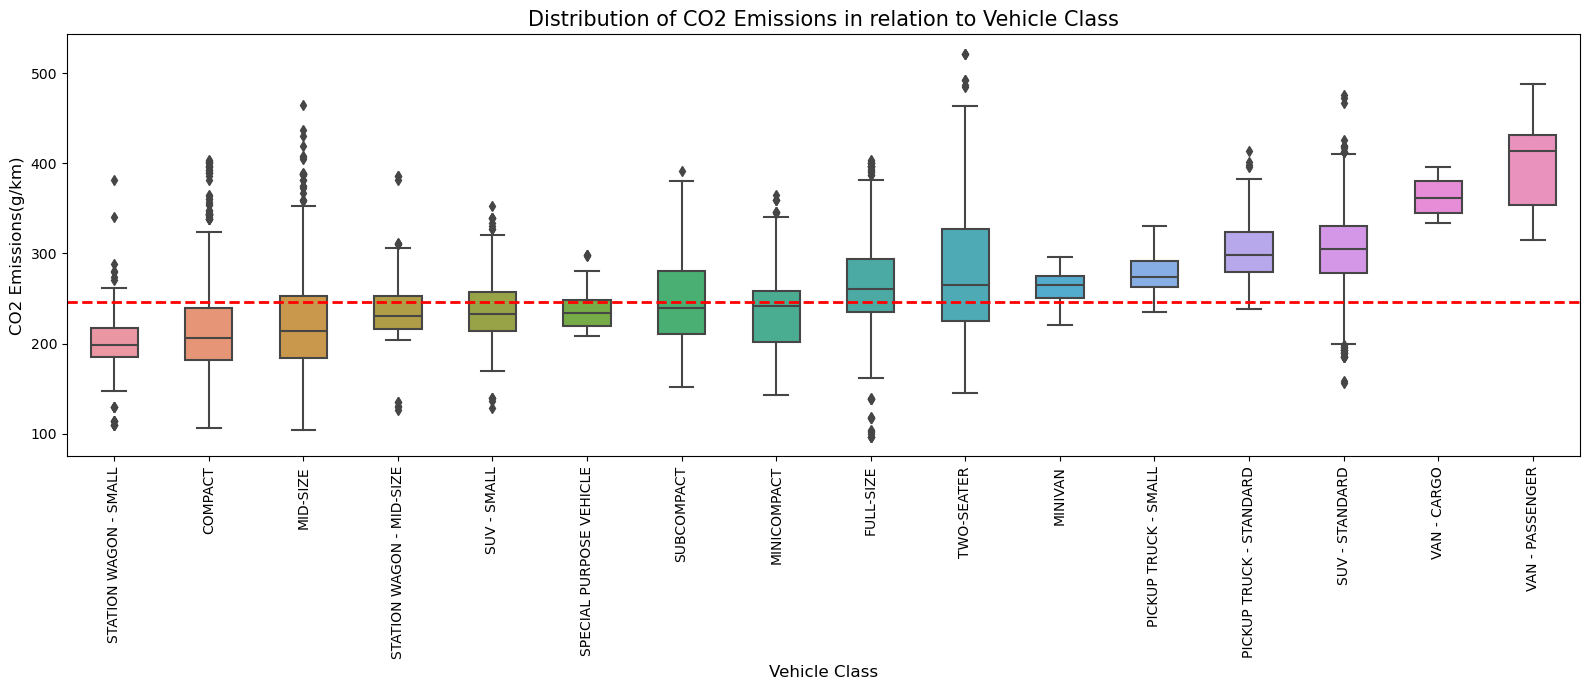

In [46]:
plt.figure(figsize=(16,7))
order = df.groupby("vehicle_class")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="vehicle_class", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Vehicle Class", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Vehicle Class", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

In [47]:
#3. Feature: transmission

Text(0, 0.5, 'CO2 Emissions(g/km)')

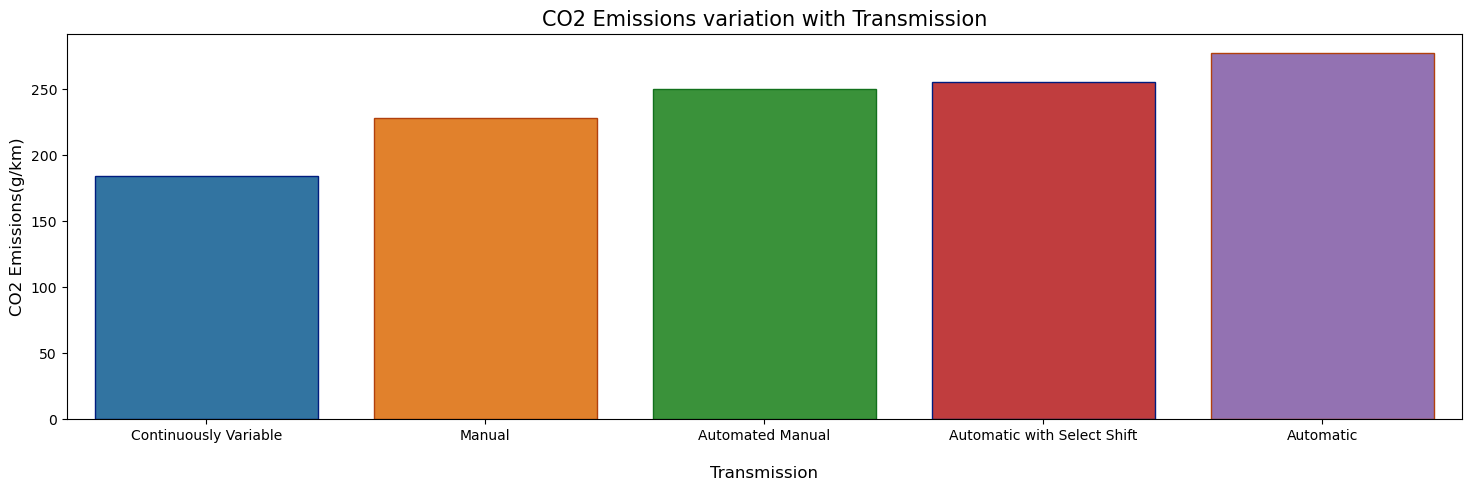

In [48]:
CO2_transmission = df.groupby(["transmission"])['co2_emissions'].mean().sort_values().reset_index()

plt.figure(figsize=(18,5))
sns.barplot(x = "transmission",y="co2_emissions", data = CO2_transmission,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Transmission', fontsize=15)
plt.xlabel('\nTransmission', fontsize=12)
plt.xticks(horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

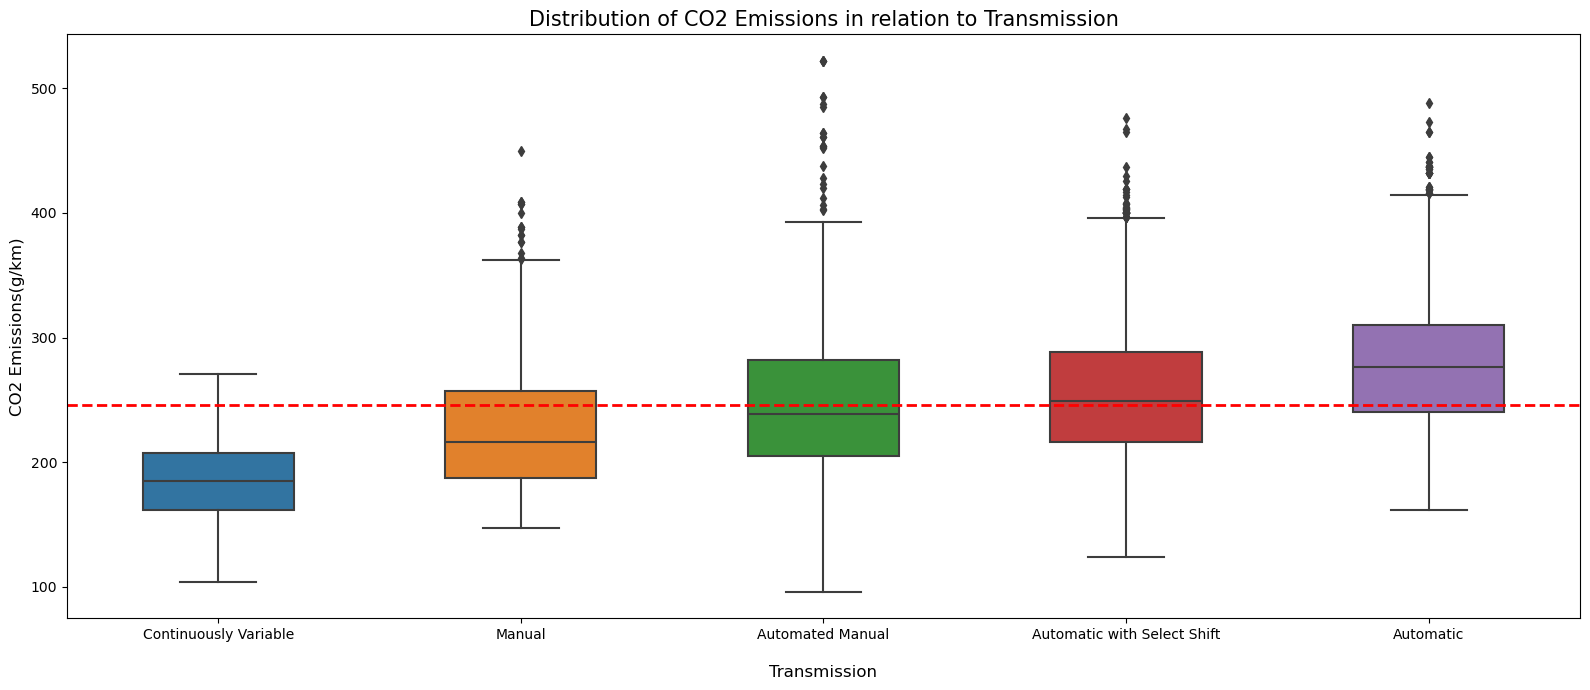

In [49]:
plt.figure(figsize=(16,7))
order = df.groupby("transmission")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="transmission", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Transmission", fontsize=15)
plt.xlabel("\nTransmission", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

In [50]:
#4. Feature: fuel_type

Text(0, 0.5, 'CO2 Emissions(g/km)')

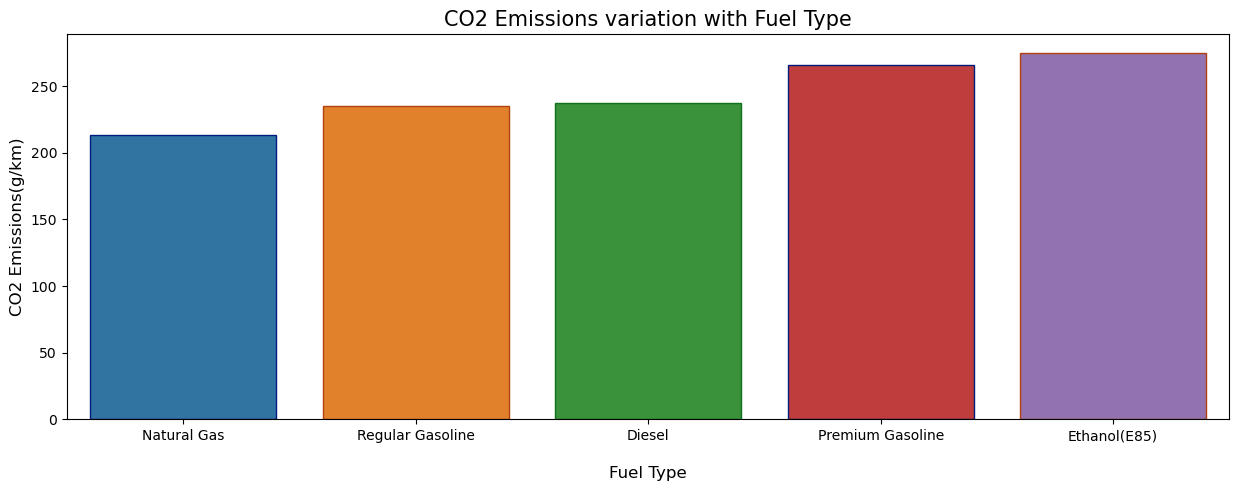

In [51]:
CO2_fuel_type = df.groupby(['fuel_type'])['co2_emissions'].mean().sort_values().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = "fuel_type",y="co2_emissions",data = CO2_fuel_type,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Fuel Type', fontsize=15)
plt.xlabel('\nFuel Type', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

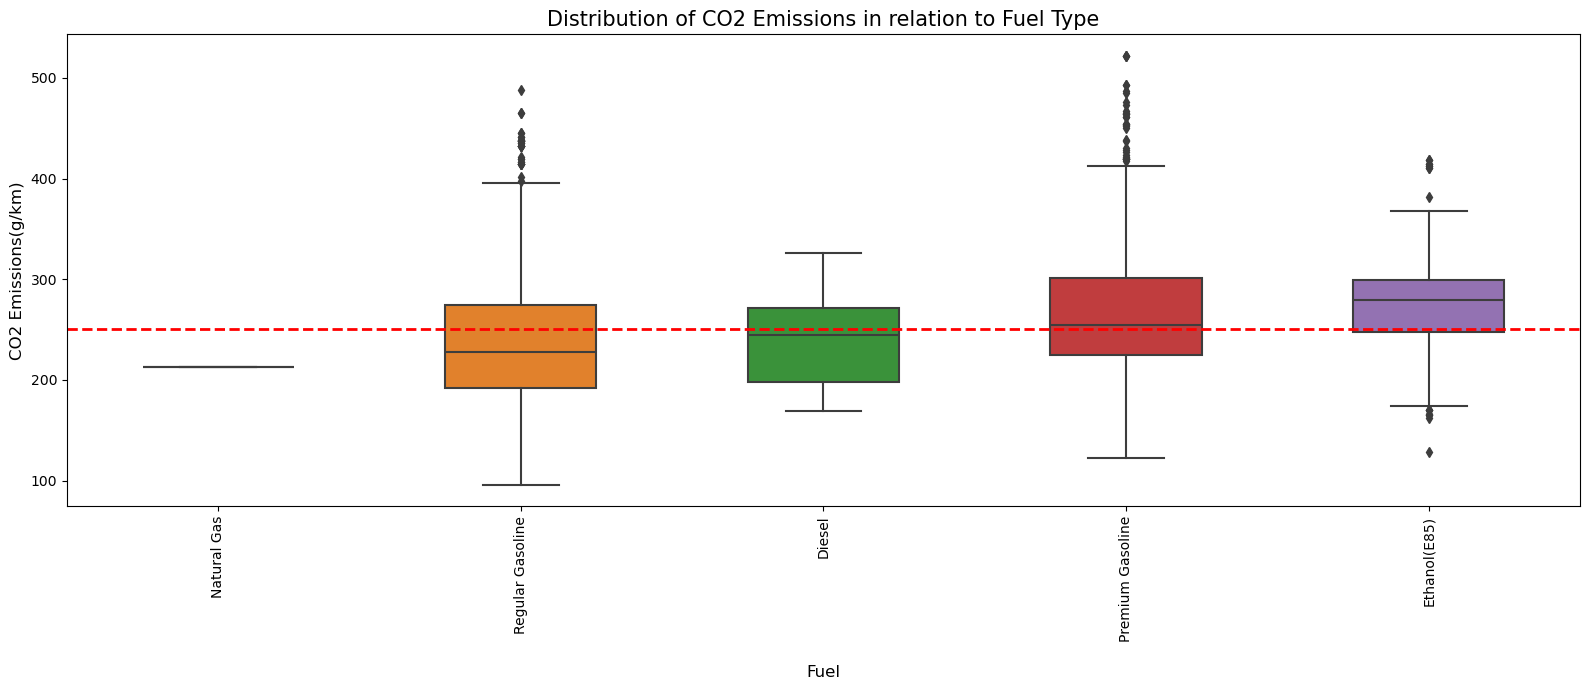

In [52]:
plt.figure(figsize=(16,7))
order = df.groupby("fuel_type")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="fuel_type", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Fuel Type", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("\nFuel", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["co2_emissions"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

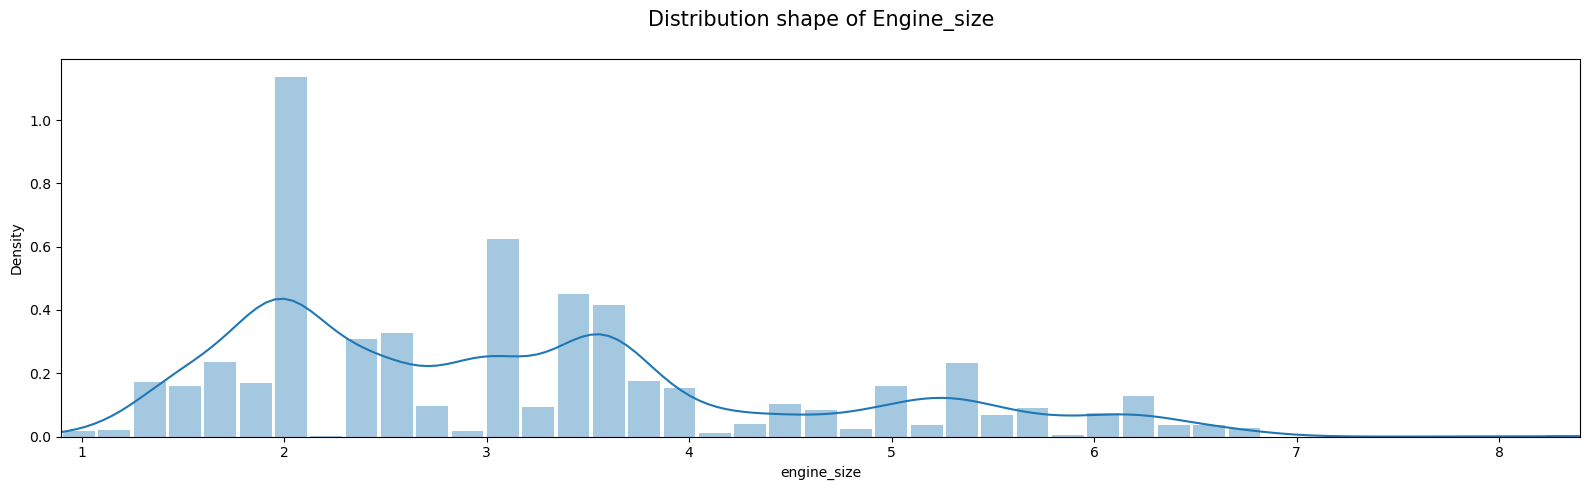

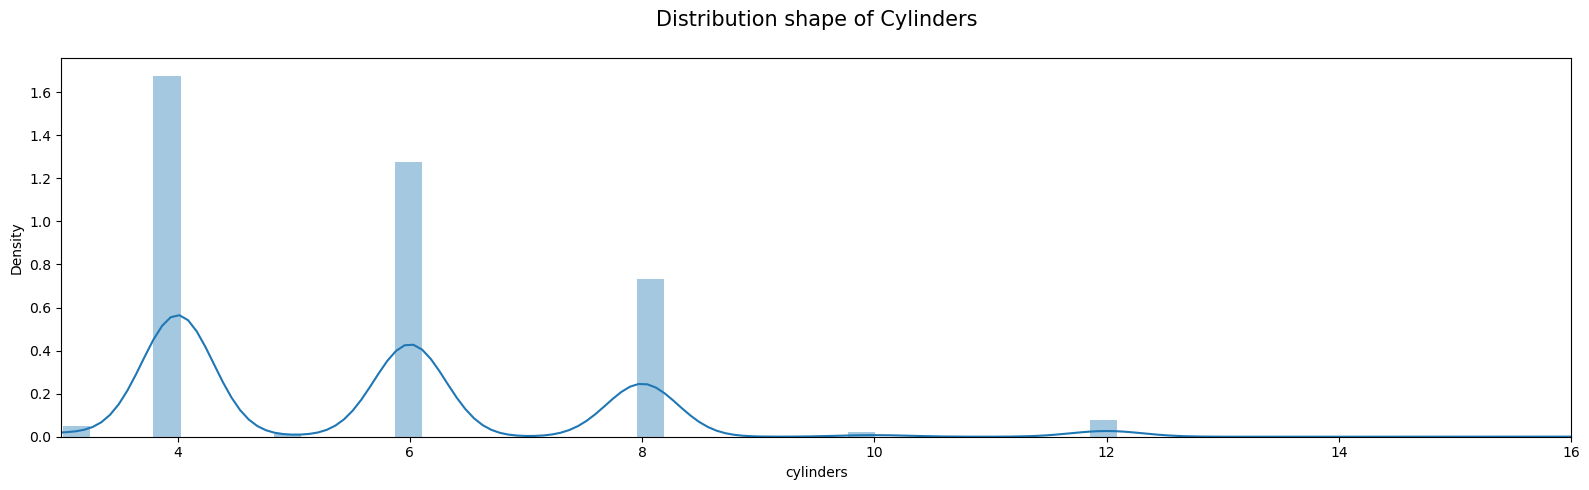

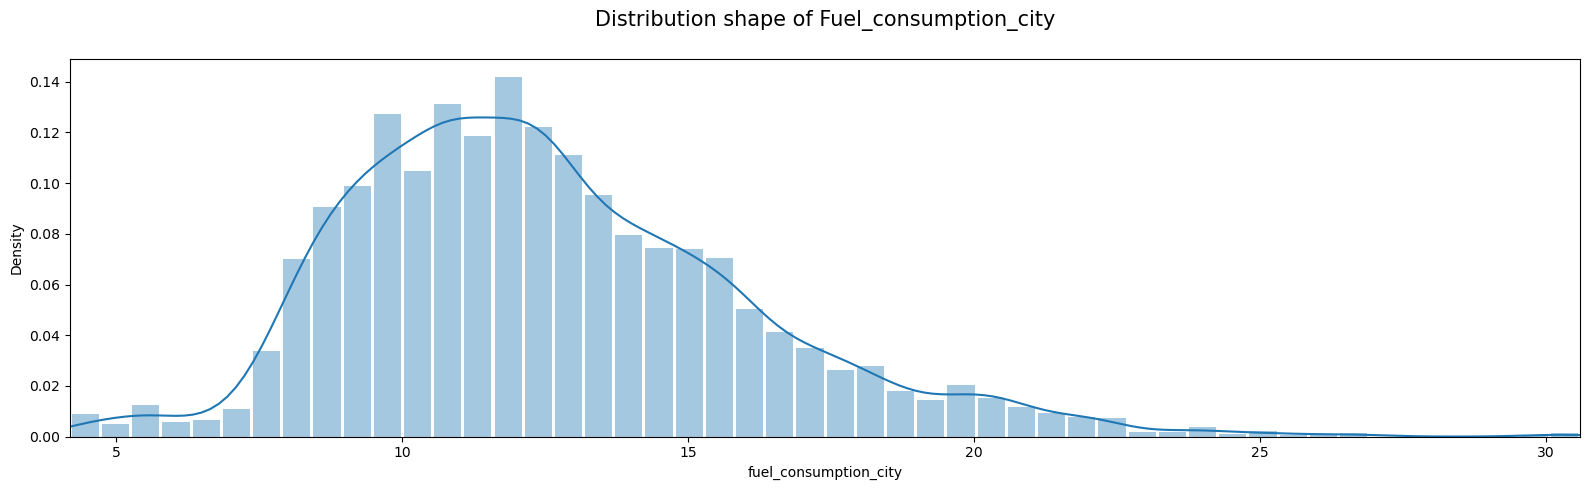

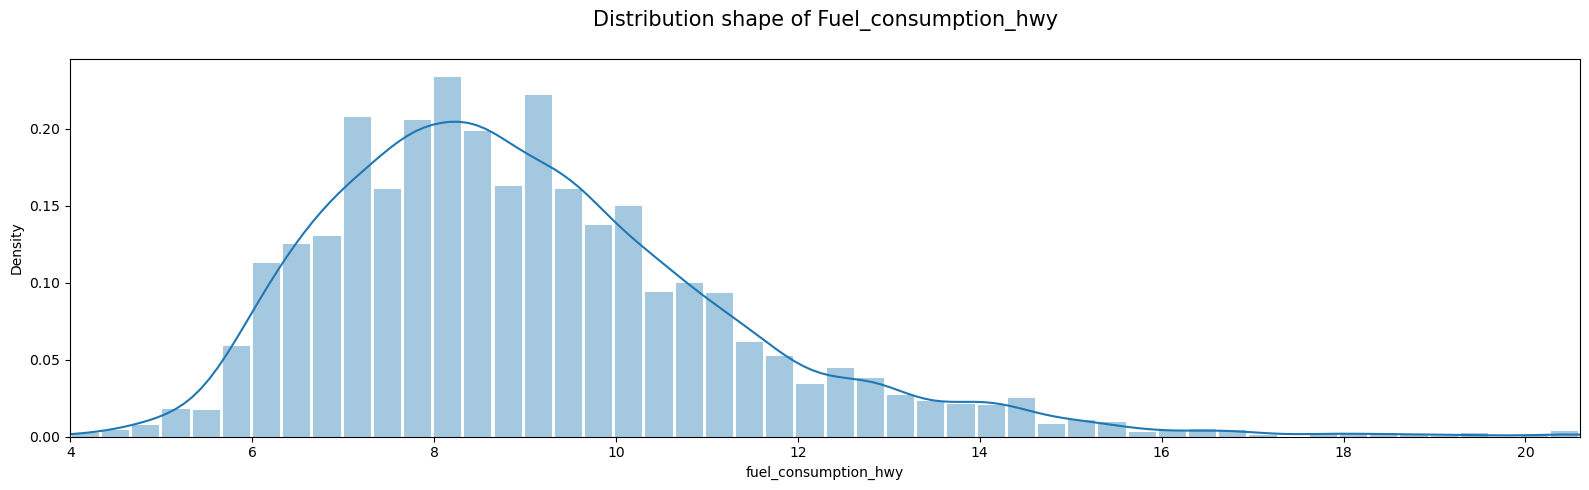

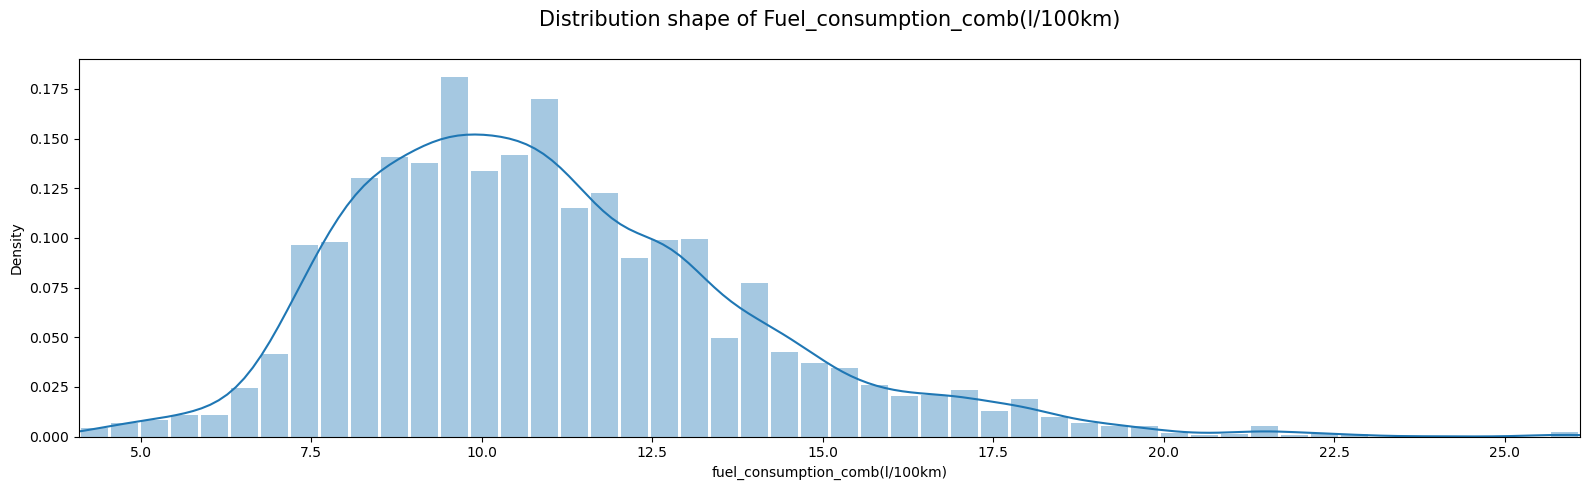

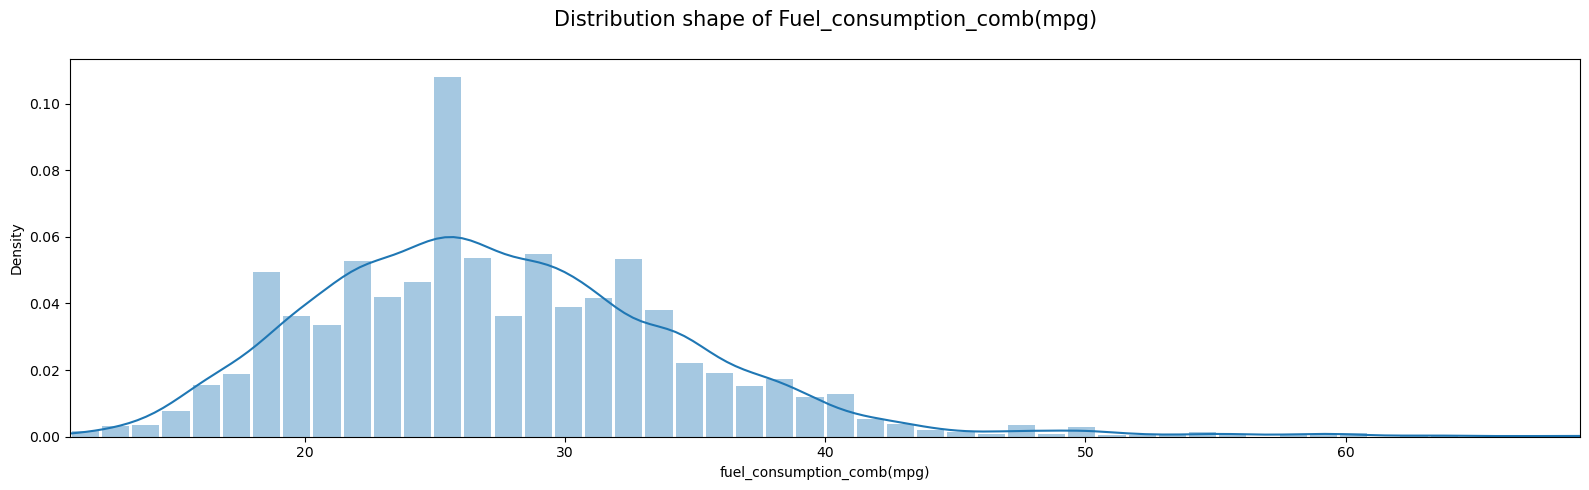

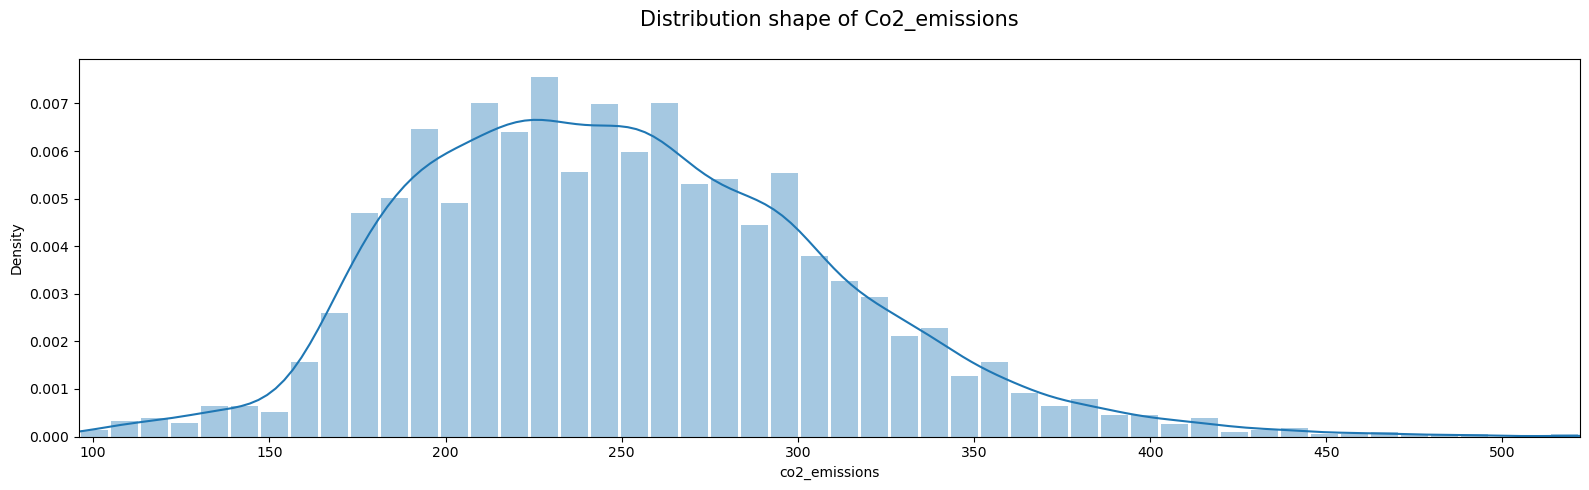

In [57]:
for feature in df.select_dtypes("number").columns:
    
    plt.figure(figsize=(16,5))
    sns.distplot(df[feature], hist_kws={"rwidth": 0.9})
    plt.xlim(df[feature].min(), df[feature].max())
    plt.title(f"Distribution shape of {feature.capitalize()}\n", fontsize=15)
    plt.tight_layout()
    plt.show()

In [58]:
#To visualize the distribution of the dependent varibale using a Frequency Distribution plot and a Box plot

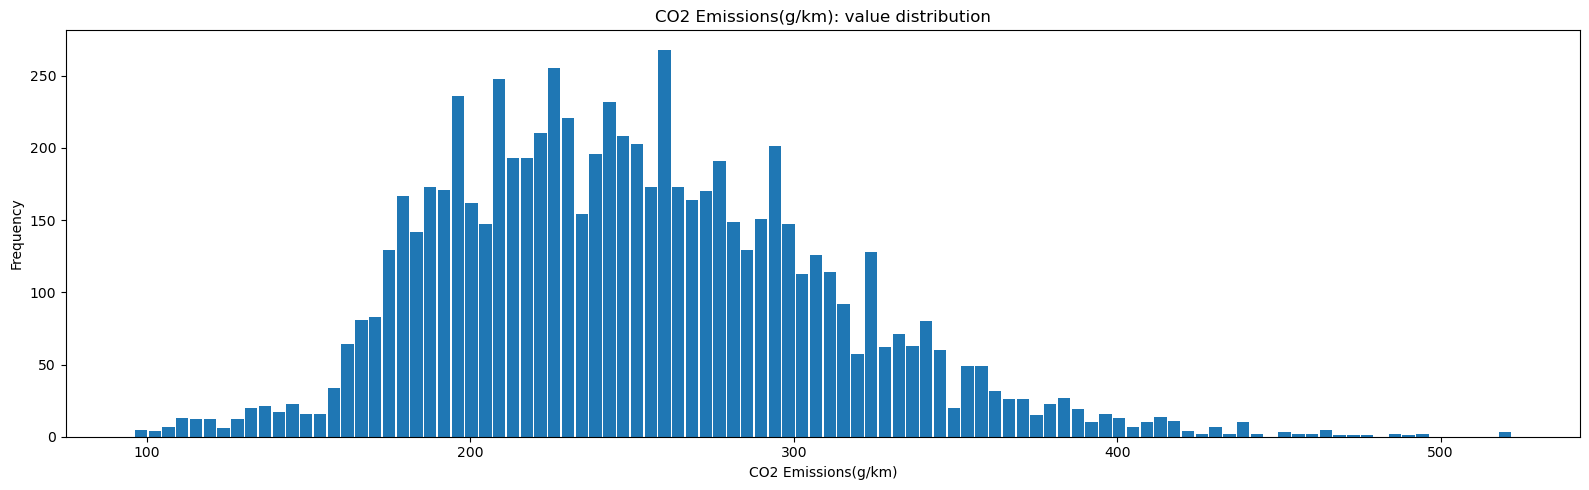

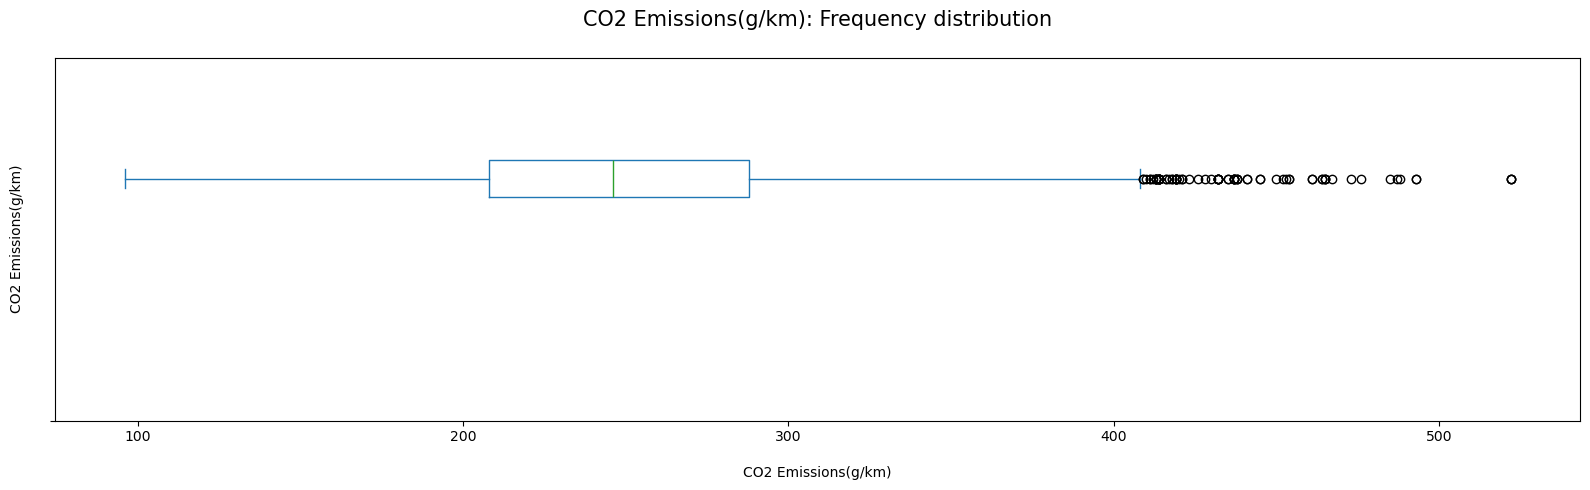

In [59]:
plt.figure(figsize=(16,5))
df["co2_emissions"].plot(kind="hist", bins=100, rwidth=0.9)
plt.title("CO2 Emissions(g/km): value distribution")
plt.xlabel("CO2 Emissions(g/km)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,5))
df["co2_emissions"].plot(kind="box", vert=False)
plt.title("CO2 Emissions(g/km): Frequency distribution\n", fontsize=15)
plt.xlabel("\nCO2 Emissions(g/km)")
plt.yticks([0], [''])
plt.ylabel("CO2 Emissions(g/km)\n", rotation=90)
plt.tight_layout()
plt.show()

In [60]:
#Correlation Matrix

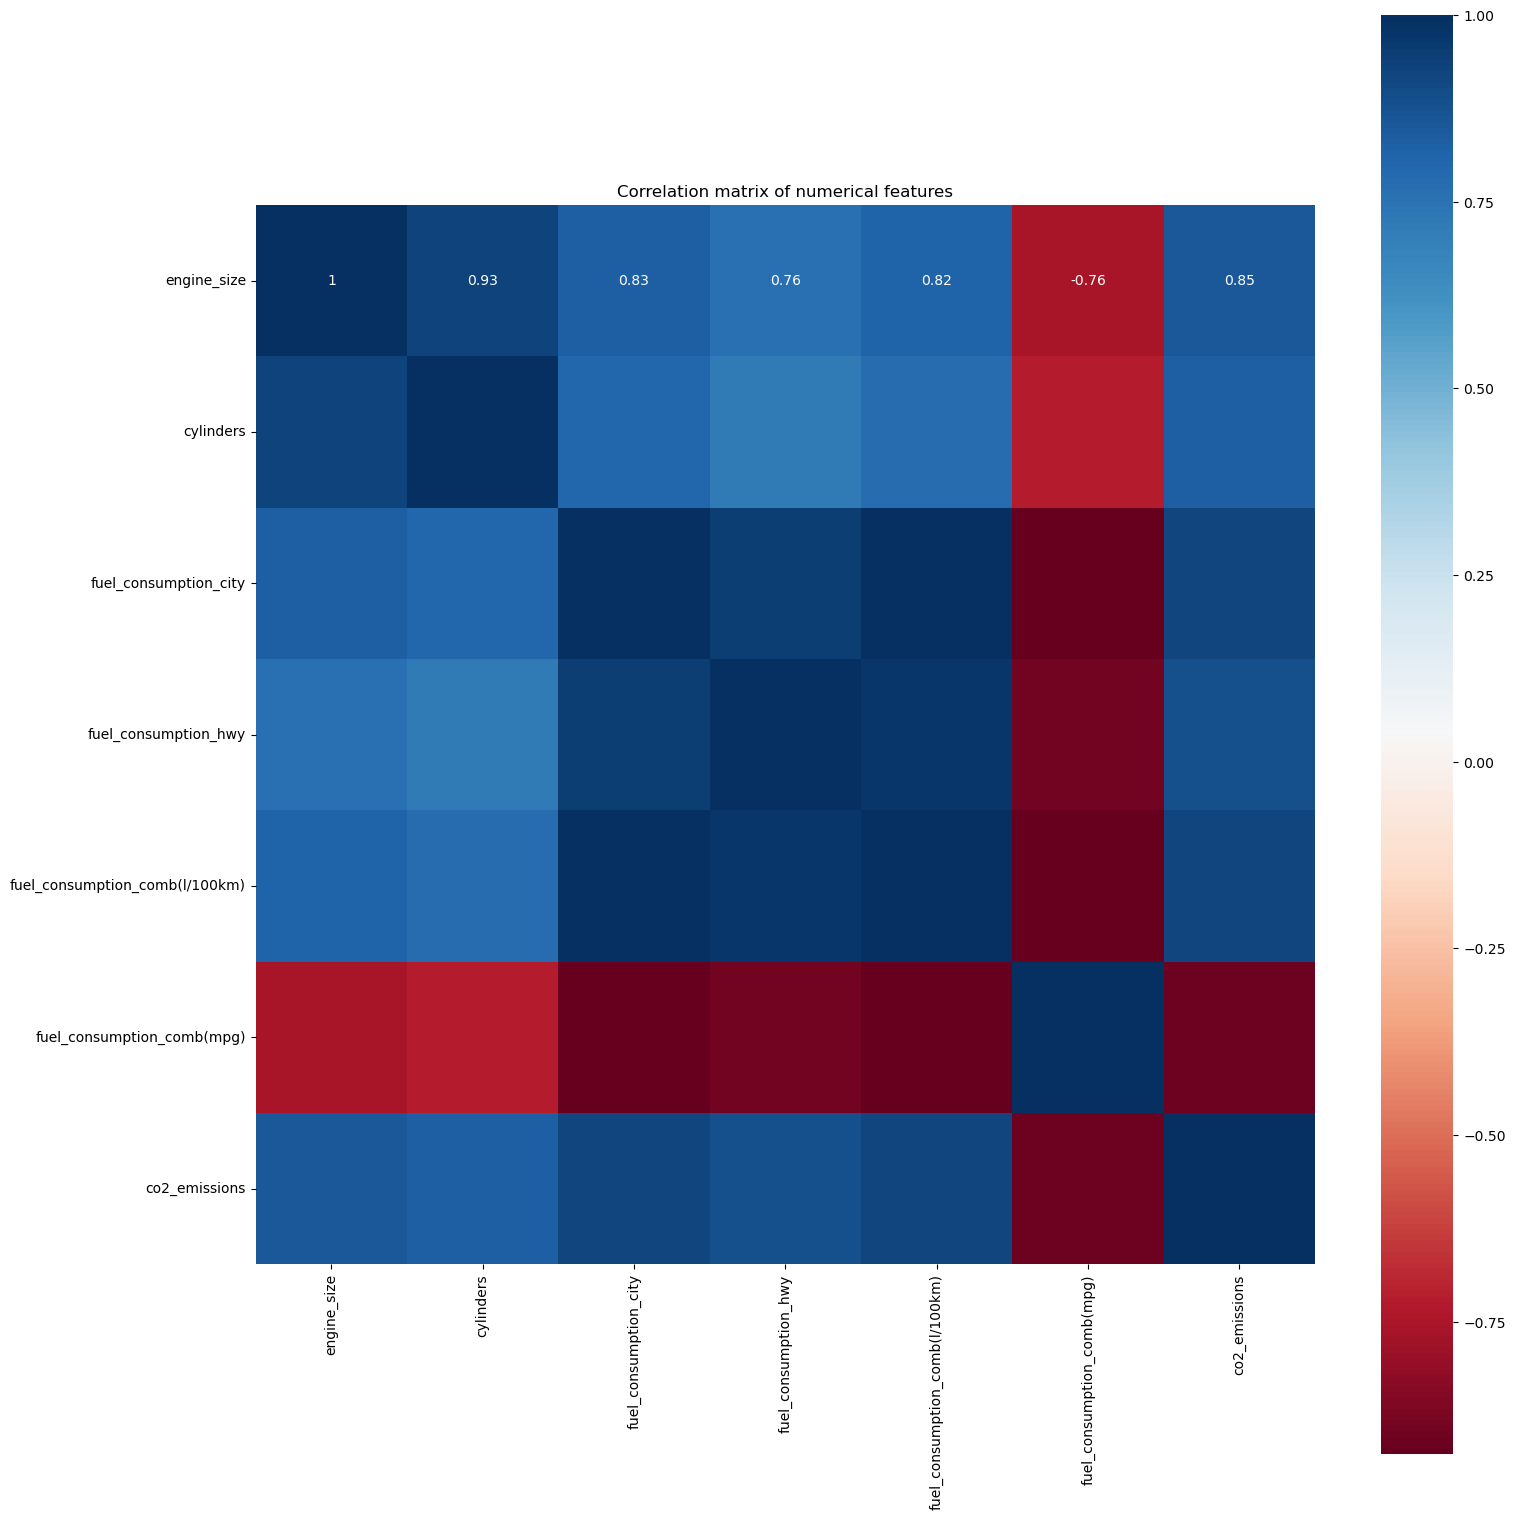

In [72]:
corr = df[['engine_size','cylinders','fuel_consumption_city','fuel_consumption_hwy','fuel_consumption_comb(l/100km)','fuel_consumption_comb(mpg)','co2_emissions']].corr()
plt.subplots(figsize=(16,16));
sns.heatmap(corr, annot=True, cmap="RdBu", square=True)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

In [73]:
#Correlation of independent features with dependent variable¶

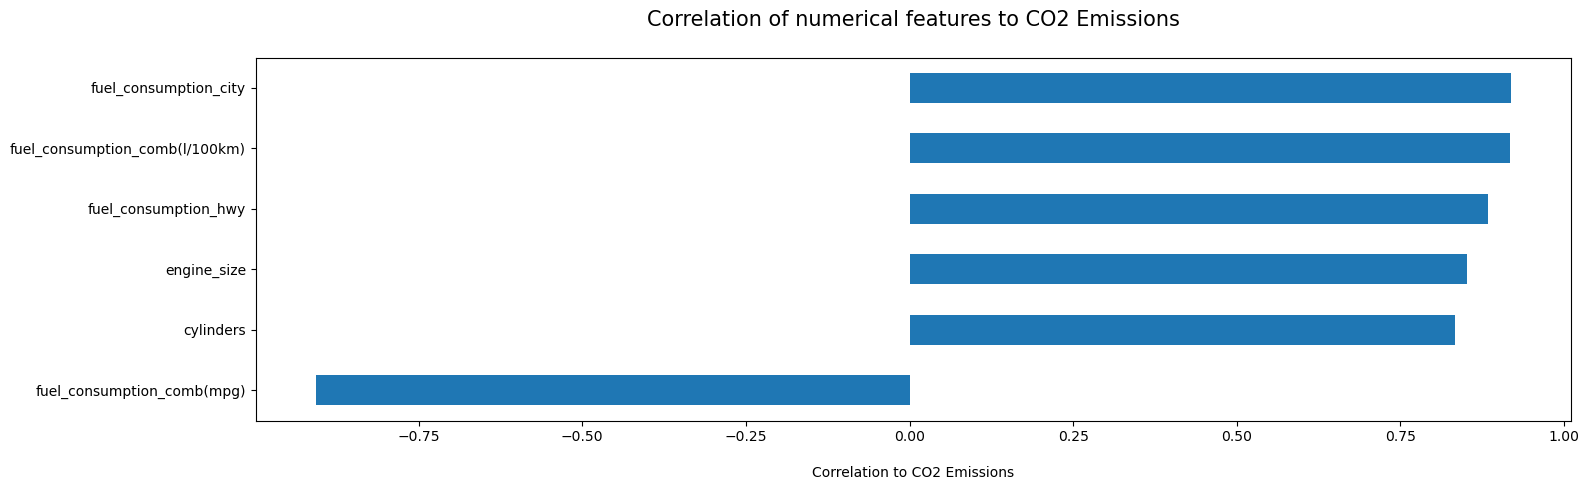

In [74]:
plt.figure(figsize=(16,5))
corr["co2_emissions"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to CO2 Emissions\n", fontsize=15)
plt.xlabel("\nCorrelation to CO2 Emissions")
plt.tight_layout()
plt.show()

In [75]:
#Variation in CO2 emissions with different features

In [76]:
#1.Feature: cylinders

Text(0, 0.5, 'CO2 Emissions(g/km)')

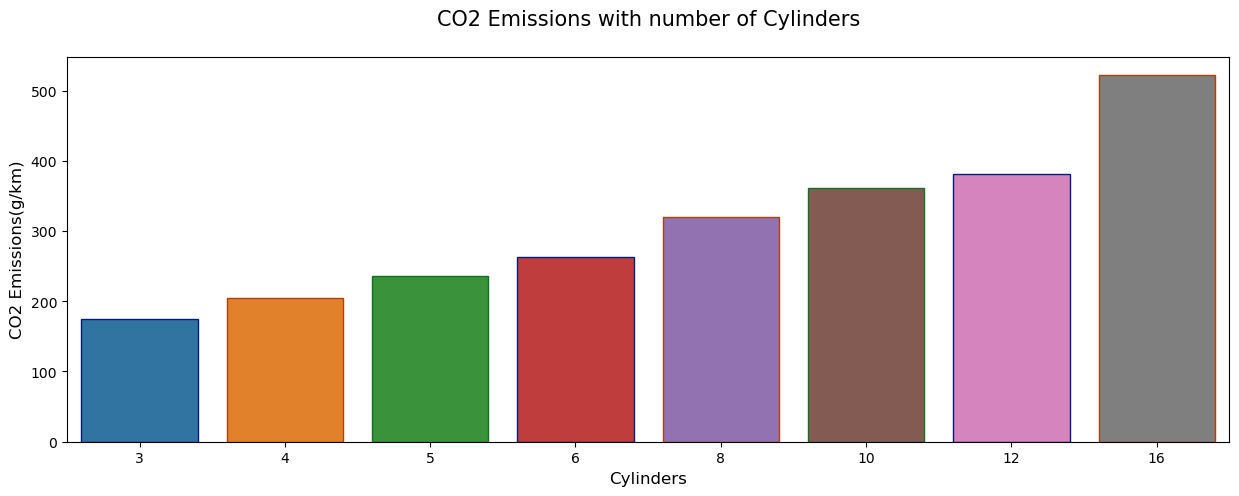

In [77]:
CO2_cylinder = df.groupby(['cylinders'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = "cylinders",y="co2_emissions",data = CO2_cylinder,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with number of Cylinders\n', fontsize=15)
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0, 0.5, 'Fuel Consumption Comb (L/100 km)')

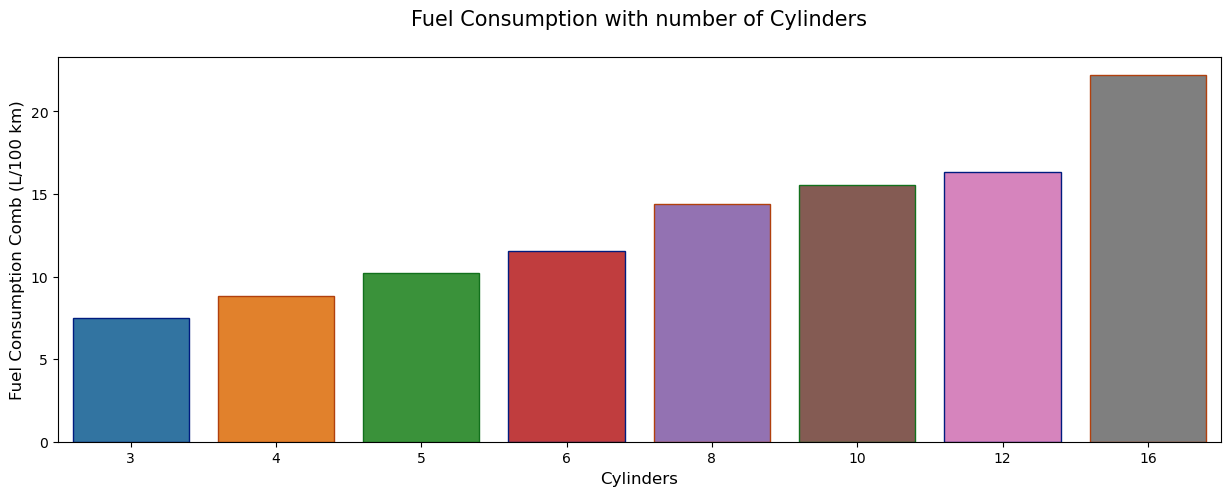

In [78]:
fuel_cylinder = df.groupby(['cylinders'])['fuel_consumption_comb(l/100km)'].mean().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = "cylinders",y="fuel_consumption_comb(l/100km)",data = fuel_cylinder,
            edgecolor=sns.color_palette("dark", 3))
plt.title('Fuel Consumption with number of Cylinders\n', fontsize=15)
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('Fuel Consumption Comb (L/100 km)', fontsize=12)

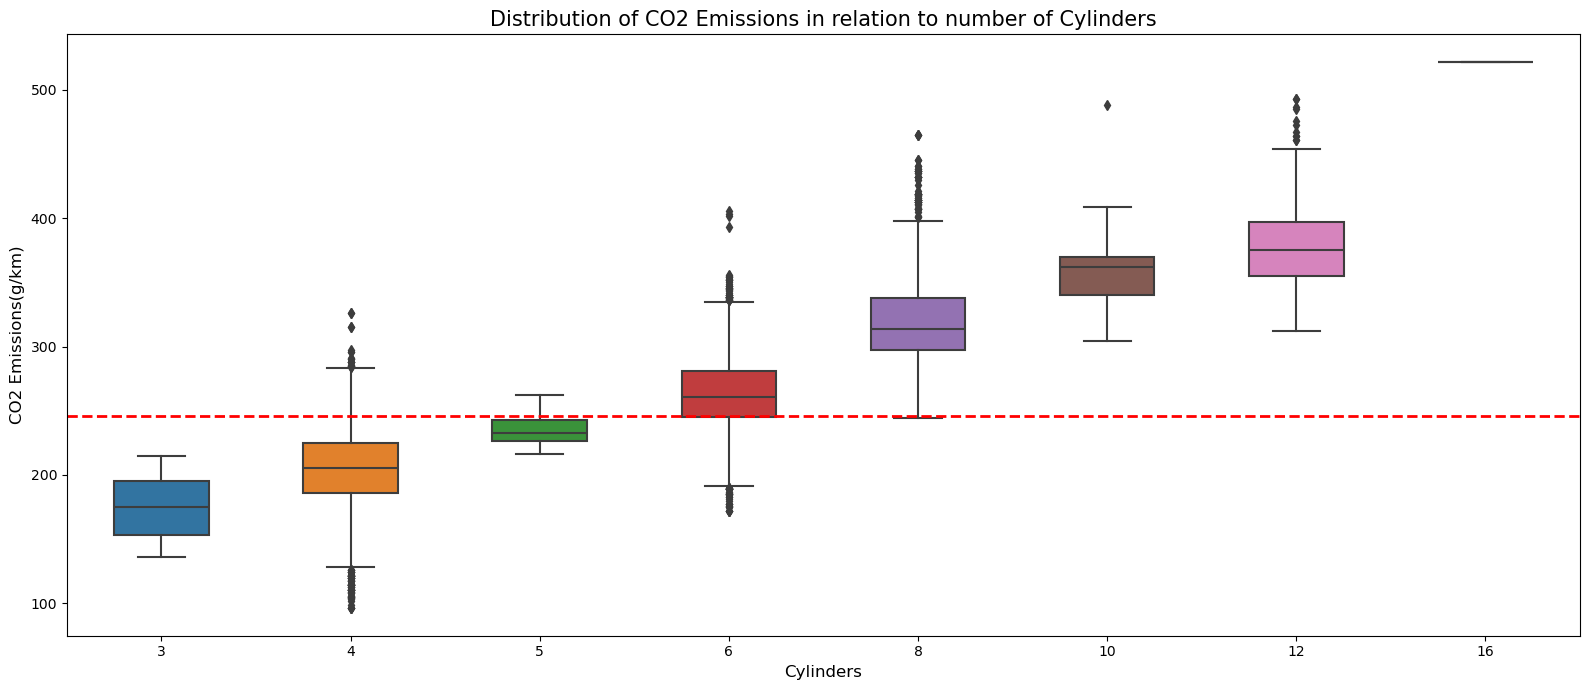

In [81]:
plt.figure(figsize=(16,7))
order = df.groupby("cylinders")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="cylinders", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to number of Cylinders", fontsize=15)
plt.xlabel("Cylinders", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

In [82]:
#2. Feature: engine_size

Text(0, 0.5, 'CO2 Emissions(g/km)')

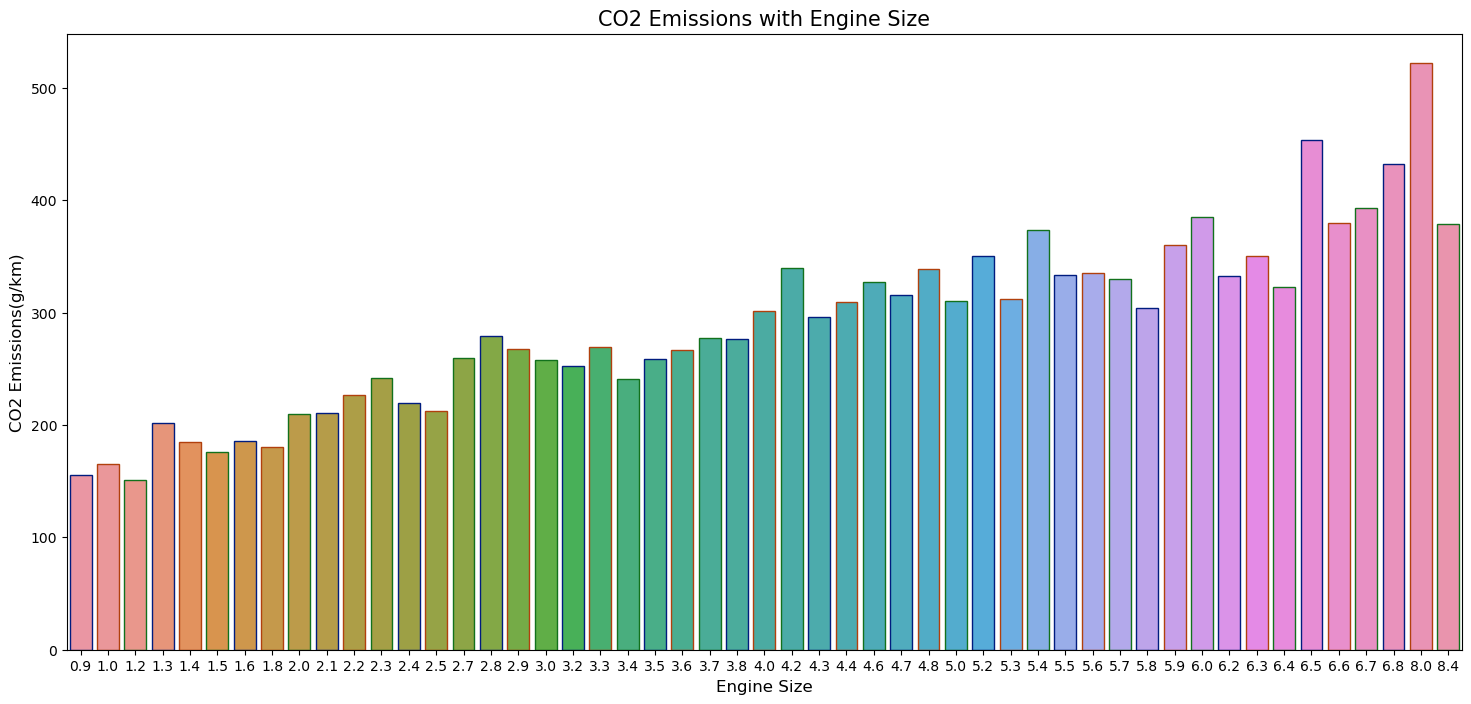

In [83]:
CO2_engine = df.groupby(['engine_size'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(18,8))
sns.barplot(x = "engine_size",y="co2_emissions",data = CO2_engine,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Engine Size', fontsize=15)
plt.xlabel('Engine Size', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0, 0.5, 'Fuel Consumption Comb (L/100 km)')

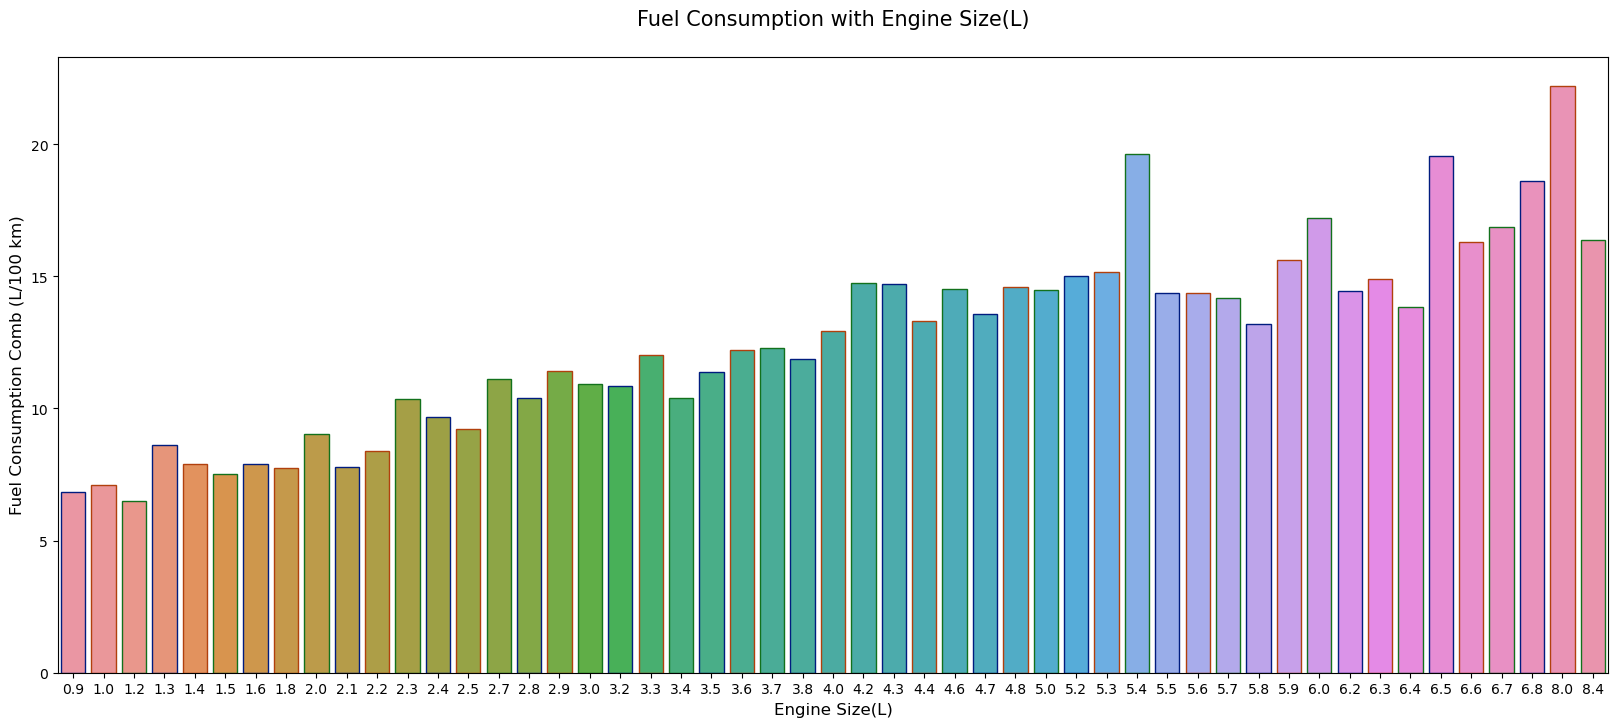

In [84]:
fuel_engine = df.groupby(['engine_size'])['fuel_consumption_comb(l/100km)'].mean().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "engine_size",y="fuel_consumption_comb(l/100km)",data = fuel_engine,
            edgecolor=sns.color_palette("dark", 3))
plt.title('Fuel Consumption with Engine Size(L)\n', fontsize=15)
plt.xlabel('Engine Size(L)', fontsize=12)
plt.ylabel('Fuel Consumption Comb (L/100 km)', fontsize=12)

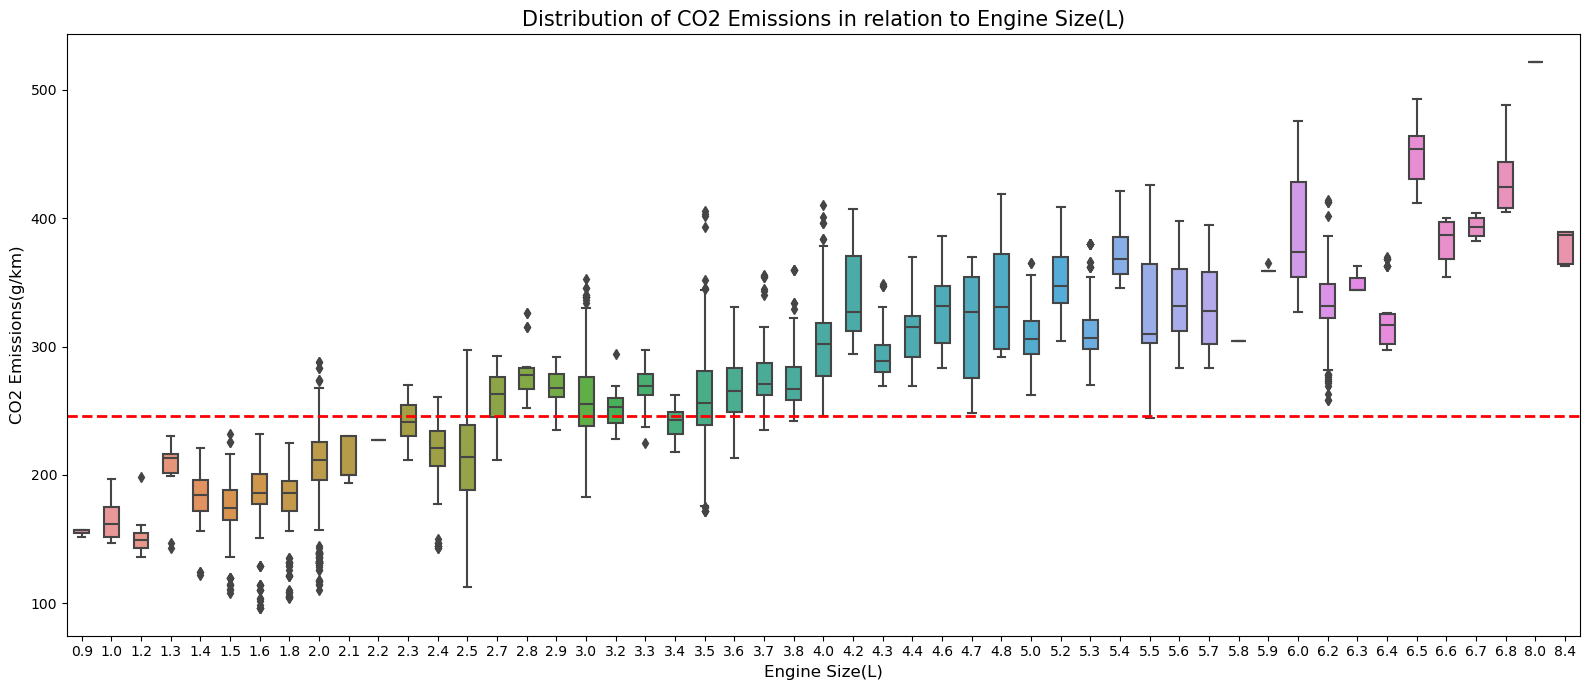

In [85]:
plt.figure(figsize=(16,7))
order = df.groupby("engine_size")["co2_emissions"].median().index
sns.boxplot(x="engine_size", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Engine Size(L)", fontsize = 15)
plt.xlabel("Engine Size(L)", fontsize = 12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

In [87]:
#3. Feature : Fuel Consumption City (L/100 km)

Text(0, 0.5, 'CO2 Emissions(g/km)')

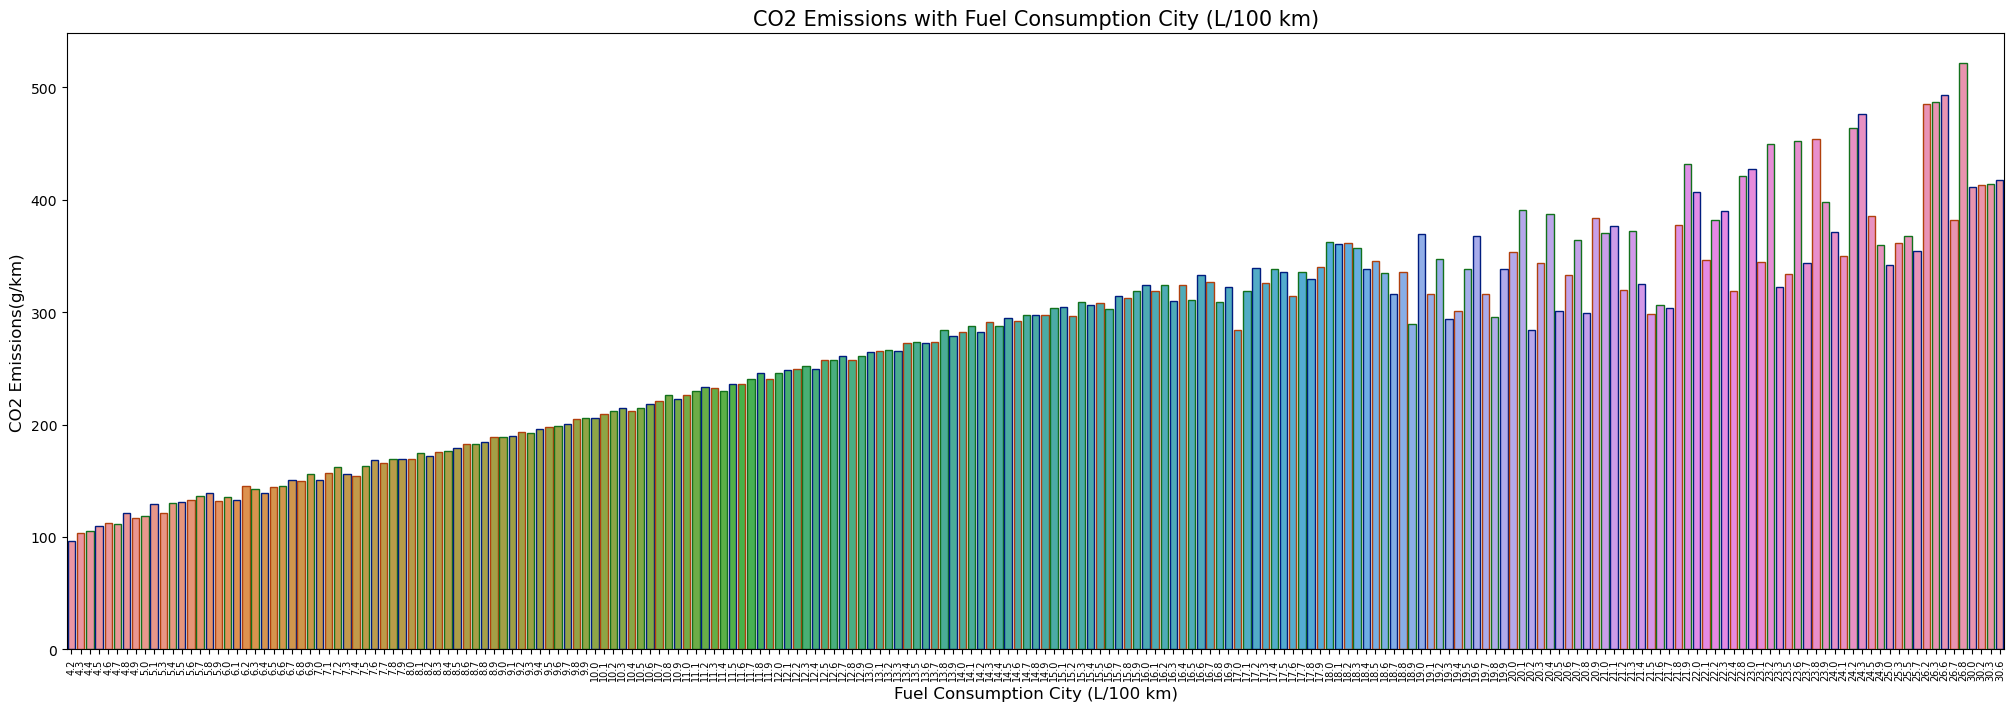

In [88]:
CO2_city = df.groupby(['fuel_consumption_city'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "fuel_consumption_city", y="co2_emissions",data = CO2_city,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption City (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption City (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

In [89]:
#4. Feature : Fuel Consumption Hwy (L/100 km)

Text(0, 0.5, 'CO2 Emissions(g/km)')

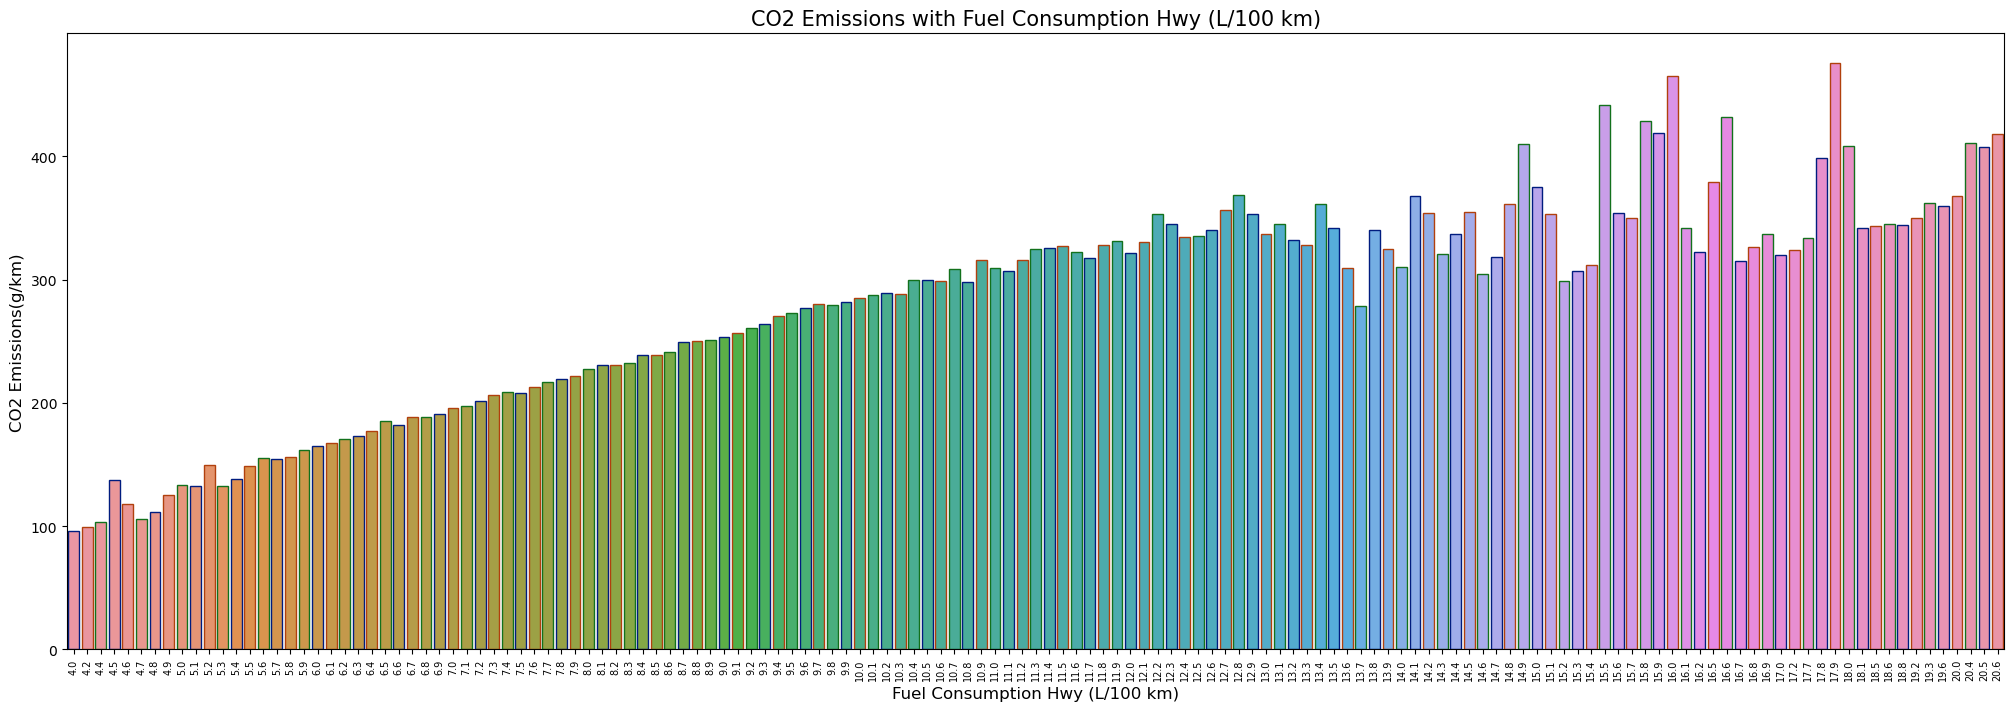

In [90]:
CO2_hwy = df.groupby(['fuel_consumption_hwy'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "fuel_consumption_hwy", y="co2_emissions",data = CO2_hwy,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Hwy (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption Hwy (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

In [91]:
#5. Feature : Fuel Consumption Comb (L/100 km)

Text(0, 0.5, 'CO2 Emissions(g/km)')

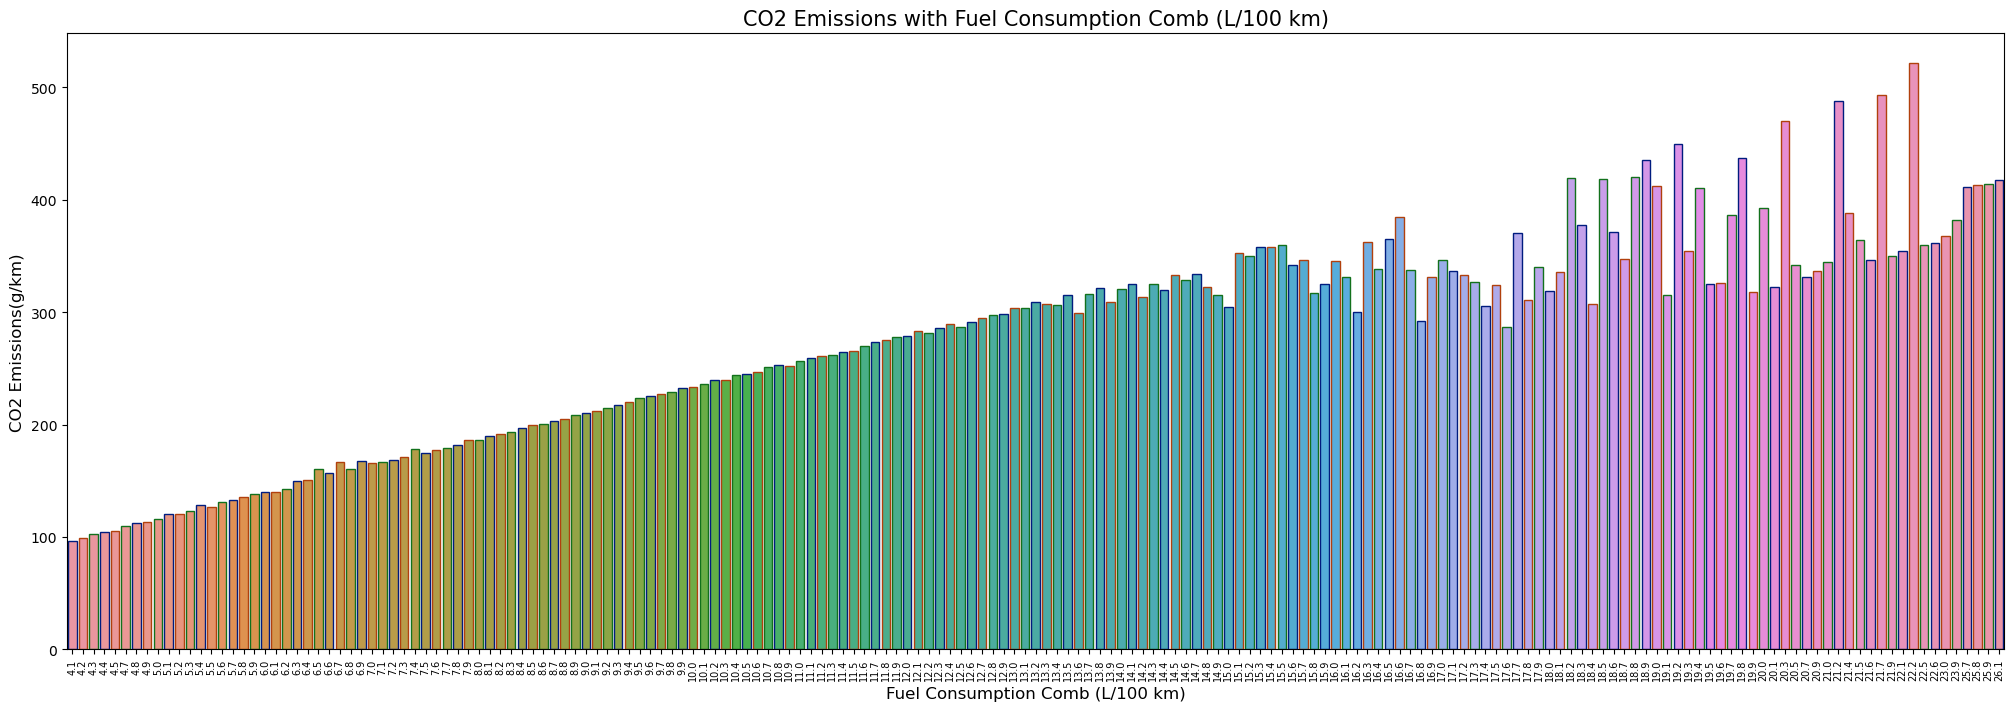

In [92]:
CO2_comb = df.groupby(['fuel_consumption_comb(l/100km)'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "fuel_consumption_comb(l/100km)", y="co2_emissions",data = CO2_comb,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption Comb (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

In [93]:
#6. Feature : Fuel Consumption Comb (mpg)

Text(0, 0.5, 'CO2 Emissions(g/km)')

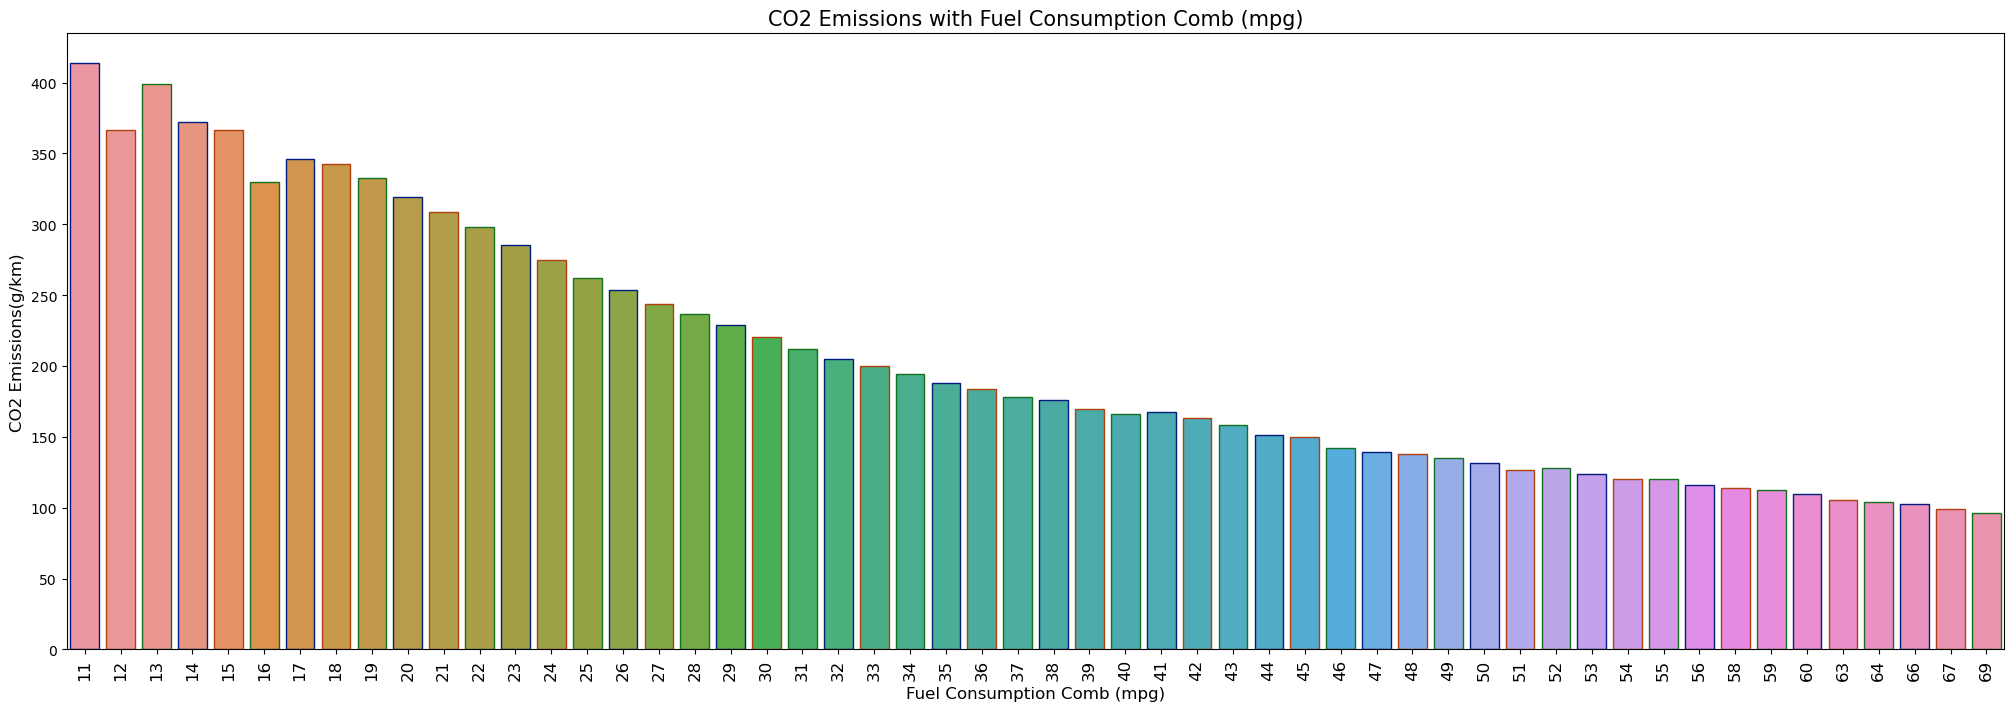

In [94]:
CO2_comb_mpg = df.groupby(['fuel_consumption_comb(mpg)'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "fuel_consumption_comb(mpg)", y="co2_emissions",data = CO2_comb_mpg,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (mpg)', fontsize=15)
plt.xlabel('Fuel Consumption Comb (mpg)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='12')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)